<a href="https://colab.research.google.com/github/dimi-fn/Emotion-Recognition-in-Movie-Abstracts/blob/master/4e_Final_Model_%26_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing libraries for data analysis and manipulation
import pandas as pd
import numpy as np

np.random.seed(42) # to make this notebook's output stable across runs

# For plotting figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Generating the version of a wide variety of packages/libraries used & working environment
#pd.__version__
#pd.show_versions(as_json=False)

In [ ]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# `movies_final_3`

In [ ]:
downloaded = drive.CreateFile({'id':'15H_8jf2Yr7uGM1namIgxzn-LMnTnF4DE'}) 
downloaded.GetContentFile('movies_final_3.csv') 

movies_final_3 = pd.read_csv('movies_final_3.csv') 
movies_final_3.shape

(55877, 17)

## Data Exploration and Statistical Analysis

In [ ]:
movies_final_3.head()

,movieId,tmdbId,title,genres,overview,Vader_score,Vader_compound,Vader_polarity,NMF_topic,NMF_topic_description,entities,happiness,sadness,anger,disgust,fear,surprise
0,1,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"Led by Woody, Andy's toys live happily in his ...","{'neg': 0.048, 'neu': 0.886, 'pos': 0.066, 'co...",0.2500,positive,0,Battle|Offence,PERSON|PERSON|PERSON|PERSON|PERSON|PERSON|ORG|...,NaN,NaN,NaN,NaN,NaN,NaN
1,2,8844.0,Jumanji (1995),Adventure|Children|Fantasy,When siblings Judy and Peter discover an encha...,"{'neg': 0.161, 'neu': 0.702, 'pos': 0.137, 'co...",-0.4588,negative,5,War|Crime,PERSON|PERSON|ORG|PERSON|DATE|PERSON|CARDINAL,NaN,NaN,NaN,NaN,NaN,NaN
2,3,15602.0,Grumpier Old Men (1995),Comedy|Romance,A family wedding reignites the ancient feud be...,"{'neg': 0.168, 'neu': 0.791, 'pos': 0.041, 'co...",-0.7645,negative,6,Family|Relatives,PERSON|PERSON|NORP|PERSON,NaN,NaN,NaN,NaN,NaN,NaN
3,4,31357.0,Waiting to Exhale (1995),Comedy|Drama|Romance,"Cheated on, mistreated and stepped on, the wom...","{'neg': 0.06, 'neu': 0.673, 'pos': 0.267, 'com...",0.8860,positive,1,Affairs|Mystery,PERSON|PERSON|PERSON|PERSON,NaN,NaN,NaN,NaN,NaN,NaN
4,5,11862.0,Father of the Bride Part II (1995),Comedy,Just when George Banks has recovered from his ...,"{'neg': 0.0, 'neu': 0.944, 'pos': 0.056, 'comp...",0.5023,positive,0,Battle|Offence,PERSON|PERSON|PERSON|PERSON,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
movies_final_3.isnull().sum()

# missing values are all dataset -minus 300 labelled

movieId                      0
tmdbId                       0
title                        0
genres                       0
overview                     0
Vader_score                  0
Vader_compound               0
Vader_polarity               0
NMF_topic                    0
NMF_topic_description        0
entities                     0
happiness                55577
sadness                  55577
anger                    55577
disgust                  55577
fear                     55577
surprise                 55577
dtype: int64

In [ ]:
movies_final_3.head(1)

,movieId,tmdbId,title,genres,overview,Vader_score,Vader_compound,Vader_polarity,NMF_topic,NMF_topic_description,entities,happiness,sadness,anger,disgust,fear,surprise
0,1,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"Led by Woody, Andy's toys live happily in his ...","{'neg': 0.048, 'neu': 0.886, 'pos': 0.066, 'co...",0.25,positive,0,Battle|Offence,PERSON|PERSON|PERSON|PERSON|PERSON|PERSON|ORG|...,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print ("Number of unique movies: {}".format(movies_final_3.movieId.nunique()))

print ("Number of unique genres: {}".format(movies_final_3.genres.nunique()))

Number of unique movies: 55877
Number of unique genres: 1621


In [ ]:
movies_final_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55877 entries, 0 to 55876
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   movieId                55877 non-null  int64  
 1   tmdbId                 55877 non-null  float64
 2   title                  55877 non-null  object 
 3   genres                 55877 non-null  object 
 4   overview               55877 non-null  object 
 5   Vader_score            55877 non-null  object 
 6   Vader_compound         55877 non-null  float64
 7   Vader_polarity         55877 non-null  object 
 8   NMF_topic              55877 non-null  int64  
 9   NMF_topic_description  55877 non-null  object 
 10  entities               55877 non-null  object 
 11  happiness              300 non-null    float64
 12  sadness                300 non-null    float64
 13  anger                  300 non-null    float64
 14  disgust                300 non-null    float64
 15  fe

# Splitting the data between labelled and unlabelled regarding emotion

In [ ]:
# labelled dataframe
# 300 emotions to 300 movie overviews
# it should include 300 rows

data=[]
for row in movies_final_3.itertuples(index=True, name='Pandas'):
  if (row.happiness ==0 or row.happiness==1) or (row.sadness ==0 or row.sadness==1) or (row.anger==0 or row.anger==1) or (row.disgust==0 or row.disgust==1) or (row.fear==0 or row.fear==1) or (row.surprise==0 and row.surprise==1):
    data.append([row.movieId, row.tmdbId, row.title, row.genres, row.overview, row.Vader_score, row.Vader_compound, row.Vader_polarity, row.NMF_topic,
                 row.NMF_topic_description, row.entities, row.happiness, row.sadness, row.anger, row.disgust, row.fear, row.surprise])

labelled_df = pd.DataFrame(data, columns=['movieId', 'tmdbId', "title", 'genres', "overview", "Vader_score", "Vader_compound",
                                          "Vader_polarity", "NMF_topic", "NMF_topic_description", "entities", 
                                          "happiness", "sadness", "anger", "disgust", "fear", "surprise"
                                          ])
labelled_df.shape

(300, 17)

In [ ]:
labelled_df.isnull().sum().any()

False

In [ ]:
# unlabelled dataframe
# it should include initial number of rows - 300 = 55877 - 300 = 55,577 rows

data=[]
for row in movies_final_3.itertuples(index=True, name='Pandas'):
  if not((row.happiness ==0 or row.happiness==1) or (row.sadness ==0 or row.sadness==1) or (row.anger==0 or row.anger==1) or (row.disgust==0 or row.disgust==1) or (row.fear==0 or row.fear==1) or (row.surprise==0 and row.surprise==1)):
    data.append([row.movieId, row.tmdbId, row.title, row.genres, row.overview, row.Vader_score, row.Vader_compound, row.Vader_polarity, row.NMF_topic,
                 row.NMF_topic_description, row.entities, row.happiness, row.sadness, row.anger, row.disgust, row.fear, row.surprise])
    

unlabelled_df = pd.DataFrame(data, columns=['movieId', 'tmdbId', "title", 'genres', "overview", "Vader_score", "Vader_compound",
                                          "Vader_polarity", "NMF_topic", "NMF_topic_description", "entities", 
                                          "happiness", "sadness", "anger", "disgust", "fear", "surprise"
                                          ])
unlabelled_df.shape



(55577, 17)

In [ ]:
unlabelled_df.isnull().sum()

movieId                      0
tmdbId                       0
title                        0
genres                       0
overview                     0
Vader_score                  0
Vader_compound               0
Vader_polarity               0
NMF_topic                    0
NMF_topic_description        0
entities                     0
happiness                55577
sadness                  55577
anger                    55577
disgust                  55577
fear                     55577
surprise                 55577
dtype: int64

## `labelled_df`

Data Exploration and Statistical Analysis

In [ ]:
labelled_df.shape

(300, 17)

In [ ]:
labelled_df.head(1)

,movieId,tmdbId,title,genres,overview,Vader_score,Vader_compound,Vader_polarity,NMF_topic,NMF_topic_description,entities,happiness,sadness,anger,disgust,fear,surprise
0,5,11862.0,Father of the Bride Part II (1995),Comedy,Just when George Banks has recovered from his ...,"{'neg': 0.0, 'neu': 0.944, 'pos': 0.056, 'comp...",0.5023,positive,0,Battle|Offence,PERSON|PERSON|PERSON|PERSON,1.0,0.0,0.0,0.0,0.0,1.0


> We know in advance the the unique number of genres is 12, since the emotion labelling took place on 12 genres (from the top genre list of the dataset).

In [ ]:
print ("Number of unique movies: {}".format(labelled_df.movieId.nunique()))

print ("Number of unique genres: {}".format(labelled_df.genres.nunique()))

Number of unique movies: 300
Number of unique genres: 12


In [ ]:
labelled_df.describe()

,movieId,tmdbId,Vader_compound,NMF_topic,happiness,sadness,anger,disgust,fear,surprise
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,13309.990000,57695.770000,-0.031751,2.363333,0.226667,0.263333,0.350000,0.306667,0.700000,0.566667
std,33602.332169,90186.881273,0.643688,2.172646,0.419375,0.441178,0.477767,0.461880,0.459023,0.496364
min,5.000000,5.000000,-0.981400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,370.500000,12105.750000,-0.690800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1716.500000,27473.500000,0.051600,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,4078.750000,47580.000000,0.542300,4.250000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,145470.000000,581579.000000,0.984800,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
labelled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   movieId                300 non-null    int64  
 1   tmdbId                 300 non-null    float64
 2   title                  300 non-null    object 
 3   genres                 300 non-null    object 
 4   overview               300 non-null    object 
 5   Vader_score            300 non-null    object 
 6   Vader_compound         300 non-null    float64
 7   Vader_polarity         300 non-null    object 
 8   NMF_topic              300 non-null    int64  
 9   NMF_topic_description  300 non-null    object 
 10  entities               300 non-null    object 
 11  happiness              300 non-null    float64
 12  sadness                300 non-null    float64
 13  anger                  300 non-null    float64
 14  disgust                300 non-null    float64
 15  fear  

In [ ]:
labelled_df.isnull().sum().any()

False

In [ ]:
labelled_df.happiness = labelled_df.happiness.astype(int)

labelled_df.sadness = labelled_df.sadness.astype(int)

labelled_df.anger = labelled_df.anger.astype(int)

labelled_df.disgust = labelled_df.disgust.astype(int)

labelled_df.fear = labelled_df.fear.astype(int)

labelled_df.surprise = labelled_df.surprise.astype(int)

In [ ]:
labelled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   movieId                300 non-null    int64  
 1   tmdbId                 300 non-null    float64
 2   title                  300 non-null    object 
 3   genres                 300 non-null    object 
 4   overview               300 non-null    object 
 5   Vader_score            300 non-null    object 
 6   Vader_compound         300 non-null    float64
 7   Vader_polarity         300 non-null    object 
 8   NMF_topic              300 non-null    int64  
 9   NMF_topic_description  300 non-null    object 
 10  entities               300 non-null    object 
 11  happiness              300 non-null    int64  
 12  sadness                300 non-null    int64  
 13  anger                  300 non-null    int64  
 14  disgust                300 non-null    int64  
 15  fear  

In [ ]:
# a sample of movie overviews before data preprocessing
labelled_df.overview[:6]

0    Just when George Banks has recovered from his ...
1    When a man's daughter is suddenly taken during...
2    An epic look at President Richard M. Nixon—a m...
3    It's Ted the Bellhop's first night on the job....
4    Summoned from an ashram in Tibet, Ace finds hi...
5    The evil Iago pretends to be friend of Othello...
Name: overview, dtype: object

### Visualisation

The distribution of the number of words in comment texts.

> Most of the overviews' text length are within 500 characters, with some outliers around 1000 characters long.

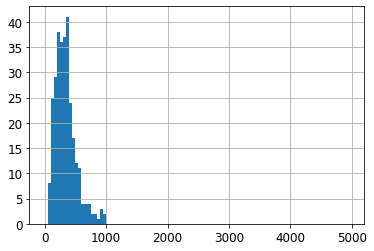

In [ ]:
lens = labelled_df.overview.str.len()
lens.hist(bins = np.arange(0,5000,50))

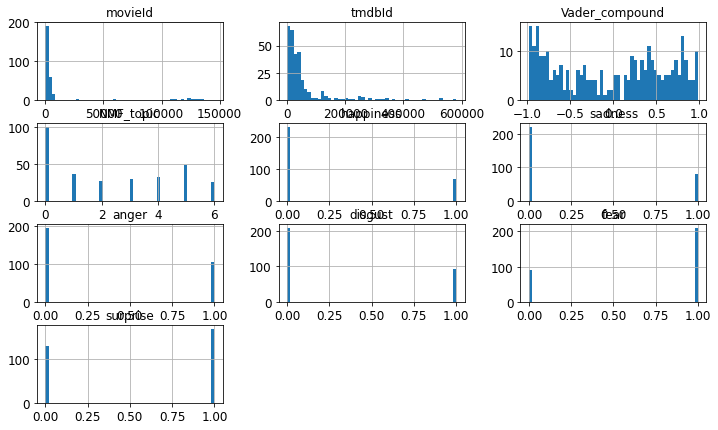

In [ ]:
# Plot histograms 
%matplotlib inline
import matplotlib.pyplot as plt

labelled_df.hist(bins=50, figsize=(12,7))
plt.show()

>Heatmap of the dataset:

>>The darker the colour(closest to 1), the stronger is the correlation. Here we notice that popularity has strong correlation with energy(nrgy), danceability(dnce), loudness(dB) (and duration, but probably not important):


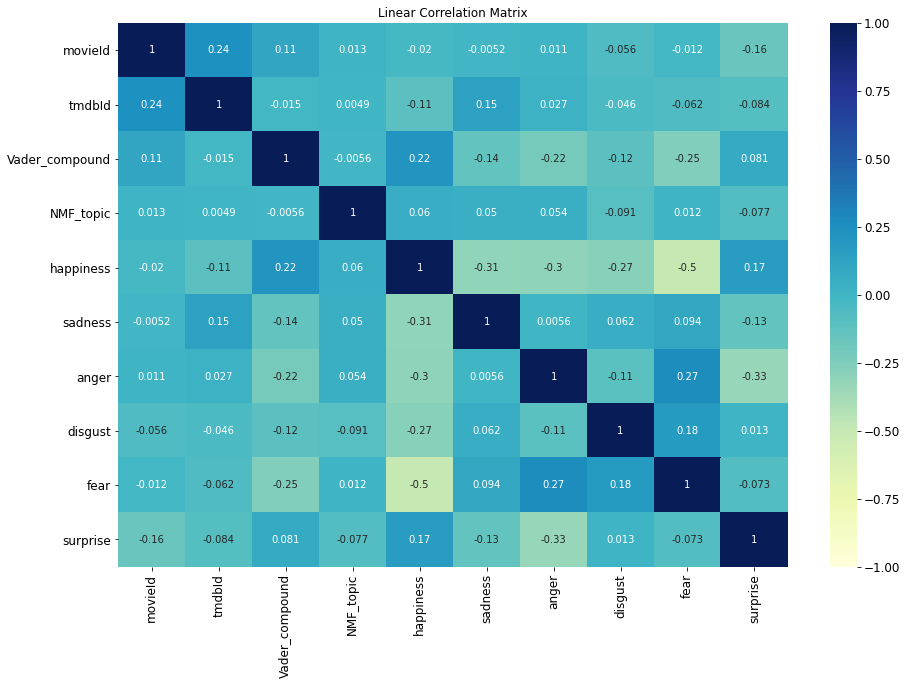

In [ ]:
# Plot linear correlation matrix
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(labelled_df.corr(), annot=True, cmap='YlGnBu', vmin=-1, vmax=1, center=0, ax=ax)
plt.title('Linear Correlation Matrix')
plt.show()

#### Wordclouds before Data Preprocessing - labelled_df



#####  Emotions - labelled_df

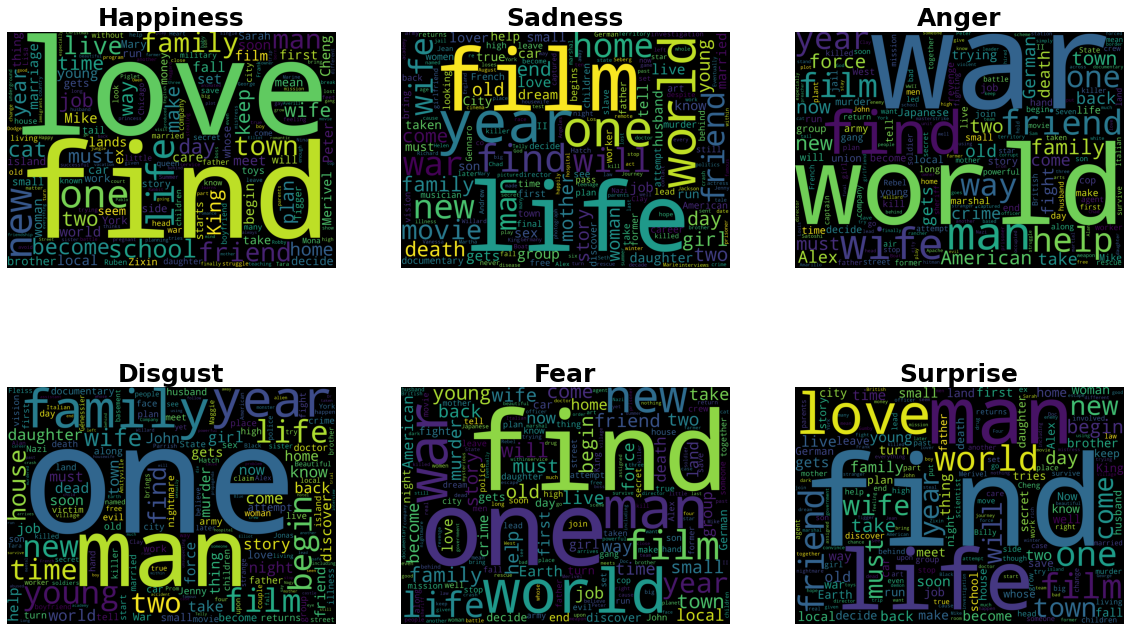

In [ ]:
from wordcloud import WordCloud,STOPWORDS

plt.figure(figsize=(20,12))

# happiness
subset = labelled_df[labelled_df.happiness==1]
overviews = subset.overview.values
cloud_happiness = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(overviews))

plt.subplot(2, 3, 1)
plt.axis('off')
plt.title("Happiness", fontsize=25, fontweight= "bold")
plt.imshow(cloud_happiness)


# sadness
subset = labelled_df[labelled_df.sadness==1]
overviews = subset.overview.values
cloud_sadness = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(overviews))

plt.subplot(2, 3, 2)
plt.axis('off')
plt.title("Sadness", fontsize=25, fontweight= "bold")
plt.imshow(cloud_sadness)


# anger
subset = labelled_df[labelled_df.anger==1]
overviews = subset.overview.values
cloud_anger = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(overviews))

plt.subplot(2, 3, 3)
plt.axis('off')
plt.title("Anger", fontsize=25, fontweight= "bold")
plt.imshow(cloud_anger)


# disgust
subset = labelled_df[labelled_df.disgust==1]
overviews = subset.overview.values
cloud_disgust = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(overviews))

plt.subplot(2, 3, 4)
plt.axis('off')
plt.title("Disgust", fontsize=25, fontweight= "bold")
plt.imshow(cloud_disgust)


# fear
subset = labelled_df[labelled_df.fear==1]
overviews = subset.overview.values
cloud_fear = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(overviews))

plt.subplot(2, 3, 5)
plt.axis('off')
plt.title("Fear", fontsize=25, fontweight= "bold")
plt.imshow(cloud_fear)


# surprise
subset = labelled_df[labelled_df.surprise==1]
overviews = subset.overview.values
cloud_surprise = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(overviews))

plt.subplot(2, 3, 6)
plt.axis('off')
plt.title("Surprise",fontsize=25, fontweight= "bold")
plt.imshow(cloud_surprise)

plt.show()

##### General - labelled_df

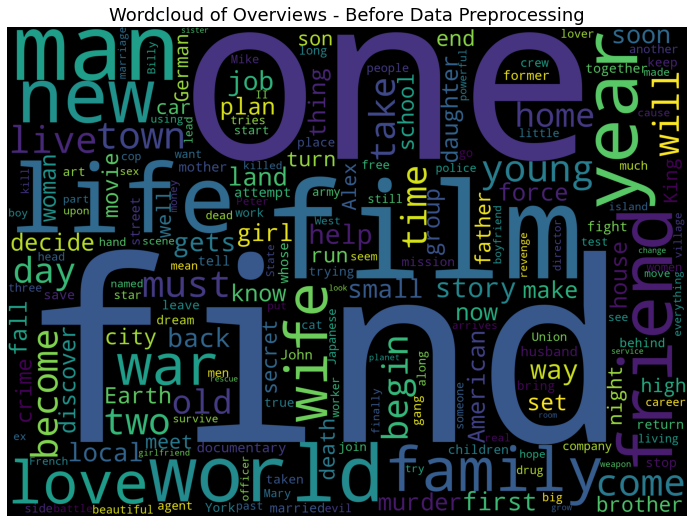

In [ ]:
plt.figure(figsize=(15,9))
# clean
subset = labelled_df
text = subset.overview.values
cloud_general = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))
plt.axis('off')
plt.title("Wordcloud of Overviews - Before Data Preprocessing",fontsize=18)
plt.imshow(cloud_general)

##### General - movies_final_3

In [ ]:
# in comments because it takes time to be executed
'''
plt.figure(figsize=(18,7))
# clean
subset = movies_final_3
text = subset.overview.values
cloud_general = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))
plt.axis('off')
plt.title("Wordcloud of Overviews - Before Data Preprocessing",fontsize=18)
plt.imshow(cloud_general)

'''

'\nplt.figure(figsize=(18,7))\n# clean\nsubset = movies_final_3\ntext = subset.overview.values\ncloud_general = WordCloud(\n                          stopwords=STOPWORDS,\n                          background_color=\'black\',\n                          collocations=False,\n                          width=2500,\n                          height=1800\n                         ).generate(" ".join(text))\nplt.axis(\'off\')\nplt.title("Wordcloud of Overviews - Before Data Preprocessing",fontsize=18)\nplt.imshow(cloud_general)\n\n'

# Building And Fine-Tuning the Final Model


# References

>[Susan Li](https://towardsdatascience.com/multi-label-text-classification-with-scikit-learn-30714b7819c5) & [Susan Li](https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/Multi%20label%20text%20classification.ipynb
) &  [Susan Li](https://towardsdatascience.com/columntransformer-meets-natural-language-processing-da1f116dd69f
)  &
[Susan Li](https://github.com/susanli2016/NLP-with-Python/blob/master/ColumnTransformer%20Meets%20NLP.ipynb
) 



> [Kartik Nooney](https://towardsdatascience.com/journey-to-the-center-of-multi-label-classification-384c40229bff) & [Kartik Nooney](https://github.com/nkartik94/Multi-Label-Text-Classification/blob/master/Mark_6.ipynb)

> [scikit-multilearn](http://scikit.ml/api/skmultilearn.html#classifiers-and-tools)

> [Shubhan Jain](https://www.analyticsvidhya.com/blog/2017/08/introduction-to-multi-label-classification/)

> [Avishek Nag](https://medium.com/towards-artificial-intelligence/understanding-multi-label-classification-model-and-accuracy-metrics-1b2a8e2648ca)

> [Allison Honold
](https://towardsdatascience.com/using-columntransformer-to-combine-data-processing-steps-af383f7d5260) & [Allison Honold
](https://github.com/allisonhonold/column_transformer_ferry_wait_blog)

> [Amber Teng](https://towardsdatascience.com/dealing-with-multiclass-data-78a1a27c5dcc) & [Amber Teng](https://github.com/angelaaaateng/Projects/blob/master/Covertype_Prediction/Scripts/Tree-Based%20and%20Bagging%20Methods.ipynb) & [Amber Teng](https://github.com/angelaaaateng/Covertype_Analysis)

> [Allison Honold
](https://towardsdatascience.com/using-columntransformer-to-combine-data-processing-steps-af383f7d5260) & [Allison Honold
](https://github.com/allisonhonold/column_transformer_ferry_wait_blog)

> [Mohammed Terry-Jack
](https://medium.com/@b.terryjack/tips-and-tricks-for-multi-class-classification-c184ae1c8ffc)

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
from sklearn import preprocessing
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

%matplotlib inline
import re
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import seaborn as sns

### Data Preprocessing

Cleaning Data

Data preprocessing with regard to movie overviews:

* convert to lower-case
* removal of html tags, punctuation, non-alphabetic characters
* removal of stopwords, and adding some few other words in the stopwords list
* fixing some informal text in the vocabulary, e.g. what's -> what is
* stemming (transform/convert words with roughly the same semantics to one standard form. For example, for amusing, amusement, and amused, the stem would be amus.)

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re
import sys
import warnings

"""
if not sys.warnoptions:
    warnings.simplefilter("ignore")
"""

'\nif not sys.warnoptions:\n    warnings.simplefilter("ignore")\n'

In [ ]:
def clean_text(text):
    text = text.lower() 
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

def clean_html(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext

def clean_punctuations(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned

def keep_alpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

# stopwords
stop_words = set(stopwords.words('english'))
stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def remove_stopwords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

# stemming 
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence


# apply in labelled dataframe
labelled_df["overview"]= labelled_df["overview"].apply(clean_text)

labelled_df["overview"]= labelled_df["overview"].apply(clean_html)

labelled_df["overview"]= labelled_df["overview"].apply(clean_punctuations)

labelled_df["overview"]= labelled_df["overview"].apply(keep_alpha)

labelled_df["overview"]= labelled_df["overview"].apply(remove_stopwords)

labelled_df["overview"]= labelled_df["overview"].apply(stemming)




labelled_df["title"]= labelled_df["title"].apply(clean_text)

labelled_df["title"]= labelled_df["title"].apply(clean_html)

labelled_df["title"]= labelled_df["title"].apply(clean_punctuations)

labelled_df["title"]= labelled_df["title"].apply(keep_alpha)

labelled_df["title"]= labelled_df["title"].apply(remove_stopwords)

labelled_df["title"]= labelled_df["title"].apply(stemming)



labelled_df["genres"]= labelled_df["genres"].apply(clean_text)

labelled_df["genres"]= labelled_df["genres"].apply(clean_html)

labelled_df["genres"]= labelled_df["genres"].apply(clean_punctuations)

labelled_df["genres"]= labelled_df["genres"].apply(keep_alpha)

labelled_df["genres"]= labelled_df["genres"].apply(remove_stopwords)

labelled_df["genres"]= labelled_df["genres"].apply(stemming)


labelled_df["NMF_topic_description"]= labelled_df["NMF_topic_description"].apply(clean_text)

labelled_df["NMF_topic_description"]= labelled_df["NMF_topic_description"].apply(clean_html)

labelled_df["NMF_topic_description"]= labelled_df["NMF_topic_description"].apply(clean_punctuations)

labelled_df["NMF_topic_description"]= labelled_df["NMF_topic_description"].apply(keep_alpha)

labelled_df["NMF_topic_description"]= labelled_df["NMF_topic_description"].apply(remove_stopwords)

labelled_df["NMF_topic_description"]= labelled_df["NMF_topic_description"].apply(stemming)


labelled_df["entities"]= labelled_df["entities"].apply(clean_text)

labelled_df["entities"]= labelled_df["entities"].apply(clean_html)

labelled_df["entities"]= labelled_df["entities"].apply(clean_punctuations)

labelled_df["entities"]= labelled_df["entities"].apply(keep_alpha)

labelled_df["entities"]= labelled_df["entities"].apply(remove_stopwords)

labelled_df["entities"]= labelled_df["entities"].apply(stemming)

# apply in unlabelled df
unlabelled_df["overview"]= unlabelled_df["overview"].apply(clean_text)

unlabelled_df["overview"]= unlabelled_df["overview"].apply(clean_html)

unlabelled_df["overview"]= unlabelled_df["overview"].apply(clean_punctuations)

unlabelled_df["overview"]= unlabelled_df["overview"].apply(keep_alpha)

unlabelled_df["overview"]= unlabelled_df["overview"].apply(remove_stopwords)

unlabelled_df["overview"]= unlabelled_df["overview"].apply(stemming)


unlabelled_df["title"]= unlabelled_df["title"].apply(clean_text)

unlabelled_df["title"]= unlabelled_df["title"].apply(clean_html)

unlabelled_df["title"]= unlabelled_df["title"].apply(clean_punctuations)

unlabelled_df["title"]= unlabelled_df["title"].apply(keep_alpha)

unlabelled_df["title"]= unlabelled_df["title"].apply(remove_stopwords)

unlabelled_df["title"]= unlabelled_df["title"].apply(stemming)


unlabelled_df["genres"]= unlabelled_df["genres"].apply(clean_text)

unlabelled_df["genres"]= unlabelled_df["genres"].apply(clean_html)

unlabelled_df["genres"]= unlabelled_df["genres"].apply(clean_punctuations)

unlabelled_df["genres"]= unlabelled_df["genres"].apply(keep_alpha)

unlabelled_df["genres"]= unlabelled_df["genres"].apply(remove_stopwords)

unlabelled_df["genres"]= unlabelled_df["genres"].apply(stemming)


unlabelled_df["NMF_topic_description"]= unlabelled_df["NMF_topic_description"].apply(clean_text)

unlabelled_df["NMF_topic_description"]= unlabelled_df["NMF_topic_description"].apply(clean_html)

unlabelled_df["NMF_topic_description"]= unlabelled_df["NMF_topic_description"].apply(clean_punctuations)

unlabelled_df["NMF_topic_description"]= unlabelled_df["NMF_topic_description"].apply(keep_alpha)

unlabelled_df["NMF_topic_description"]= unlabelled_df["NMF_topic_description"].apply(remove_stopwords)

unlabelled_df["NMF_topic_description"]= unlabelled_df["NMF_topic_description"].apply(stemming)


unlabelled_df["entities"]= unlabelled_df["entities"].apply(clean_text)

unlabelled_df["entities"]= unlabelled_df["entities"].apply(clean_html)

unlabelled_df["entities"]= unlabelled_df["entities"].apply(clean_punctuations)

unlabelled_df["entities"]= unlabelled_df["entities"].apply(keep_alpha)

unlabelled_df["entities"]= unlabelled_df["entities"].apply(remove_stopwords)

unlabelled_df["entities"]= unlabelled_df["entities"].apply(stemming)


'''
# apply in all dataframe
movies_final_3["overview"]= movies_final_3["overview"].apply(clean_text)

movies_final_3["overview"]= movies_final_3["overview"].apply(clean_html)

movies_final_3["overview"]= movies_final_3["overview"].apply(clean_punctuations)

movies_final_3["overview"]= movies_final_3["overview"].apply(keep_alpha)

movies_final_3["overview"]= movies_final_3["overview"].apply(remove_stopwords)

movies_final_3["overview"]= movies_final_3["overview"].apply(stemming)

'''

'\n# apply in all dataframe\nmovies_final_3["overview"]= movies_final_3["overview"].apply(clean_text)\n\nmovies_final_3["overview"]= movies_final_3["overview"].apply(clean_html)\n\nmovies_final_3["overview"]= movies_final_3["overview"].apply(clean_punctuations)\n\nmovies_final_3["overview"]= movies_final_3["overview"].apply(keep_alpha)\n\nmovies_final_3["overview"]= movies_final_3["overview"].apply(remove_stopwords)\n\nmovies_final_3["overview"]= movies_final_3["overview"].apply(stemming)\n\n'

In [ ]:
# sample of how now the cleaned overviews look like in the labelled dataframe
labelled_df["overview"][:6]

0    georg bank recov daughter wed receiv news preg...
1    man daughter sudden taken championship hockey ...
2    epic look presid richard nixon man carri fate ...
3    ted bellhop first night job hotel unusu guest ...
4    summon ashram tibet ace find peril journey jun...
5    evil iago pretend friend othello order manipul...
Name: overview, dtype: object

In [ ]:
# sample of how now the cleaned overviews look like in the whole dataframe
movies_final_3["overview"][:6]

0    Led by Woody, Andy's toys live happily in his ...
1    When siblings Judy and Peter discover an encha...
2    A family wedding reignites the ancient feud be...
3    Cheated on, mistreated and stepped on, the wom...
4    Just when George Banks has recovered from his ...
5    Obsessive master thief, Neil McCauley leads a ...
Name: overview, dtype: object

## Feature Engineering

Fixing the feature "Vader_score" as it appears as a json-dictionary object. Also converting the types of other features in a right way for the subsequent encoding of them into numerical values

### Fixing "Vader_Score"

In [ ]:
# fixing attribute Vader_score which is like a dictionary of values

labelled_df.Vader_score[:2]

0    {'neg': 0.0, 'neu': 0.944, 'pos': 0.056, 'comp...
1    {'neg': 0.099, 'neu': 0.759, 'pos': 0.143, 'co...
Name: Vader_score, dtype: object

In [ ]:
from pandas.api.types import is_dict_like
is_dict_like(labelled_df.Vader_score)

True

#### Fixing it in `labelled_df`

In [ ]:
# converting the Vader_score attribute into an object type
labelled_df["Vader_score"] = labelled_df["Vader_score"].astype("object")

# converting the below categorical attributes into type "category"
# they will then be label encoded and one_hot_encoded
labelled_df["title"] = labelled_df["title"].astype("category")

labelled_df["genres"] = labelled_df["genres"].astype("category")

labelled_df["Vader_polarity"] = labelled_df["Vader_polarity"].astype("category")

labelled_df["NMF_topic_description"] = labelled_df["NMF_topic_description"].astype("category")

labelled_df["entities"] = labelled_df["entities"].astype("category")


labelled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   movieId                300 non-null    int64   
 1   tmdbId                 300 non-null    float64 
 2   title                  300 non-null    category
 3   genres                 300 non-null    category
 4   overview               300 non-null    object  
 5   Vader_score            300 non-null    object  
 6   Vader_compound         300 non-null    float64 
 7   Vader_polarity         300 non-null    category
 8   NMF_topic              300 non-null    int64   
 9   NMF_topic_description  300 non-null    category
 10  entities               300 non-null    category
 11  happiness              300 non-null    int64   
 12  sadness                300 non-null    int64   
 13  anger                  300 non-null    int64   
 14  disgust                300 non-null    int

In [ ]:
labelled_df["Vader_score"] = labelled_df["Vader_score"].apply(lambda x: dict(eval(x)))

In [ ]:
df_temp= labelled_df["Vader_score"].apply(pd.Series)
df_temp[:3]

,neg,neu,pos,compound
0,0.000,0.944,0.056,0.5023
1,0.099,0.759,0.143,0.4404
2,0.229,0.771,0.000,-0.8658


In [ ]:
result= pd.concat([df_temp, labelled_df], axis=1).drop(["Vader_score", "Vader_compound"], axis=1)
result.shape
# 2 new columns added (2 columns removed, 4 were added)
# "Vader_score" is not needed anymore since its values are now displayed as new columns
# "Vader_compound" is replaced by the compound score inside the compound key values provided by the Vader_score
# Hence, we now have: "compound" (old "Vader_compound") | "neg"| "neu"| "pos"
# (300, 19)

(300, 19)

In [ ]:
labelled_df=result
labelled_df.shape

(300, 19)

In [ ]:
labelled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   neg                    300 non-null    float64 
 1   neu                    300 non-null    float64 
 2   pos                    300 non-null    float64 
 3   compound               300 non-null    float64 
 4   movieId                300 non-null    int64   
 5   tmdbId                 300 non-null    float64 
 6   title                  300 non-null    category
 7   genres                 300 non-null    category
 8   overview               300 non-null    object  
 9   Vader_polarity         300 non-null    category
 10  NMF_topic              300 non-null    int64   
 11  NMF_topic_description  300 non-null    category
 12  entities               300 non-null    category
 13  happiness              300 non-null    int64   
 14  sadness                300 non-null    int

In [ ]:
labelled_df.head(1)

,neg,neu,pos,compound,movieId,tmdbId,title,genres,overview,Vader_polarity,NMF_topic,NMF_topic_description,entities,happiness,sadness,anger,disgust,fear,surprise
0,0.0,0.944,0.056,0.5023,5,11862.0,father bride part ii,comedi,georg bank recov daughter wed receiv news preg...,positive,0,battl offenc,person person person person,1,0,0,0,0,1


In [ ]:
# changing the order of columns

labelled_df =  labelled_df[["movieId","tmdbId","title","genres","overview","Vader_polarity","compound","neg","neu","pos","NMF_topic","NMF_topic_description","entities","happiness","sadness","anger","disgust","fear","surprise"]]
labelled_df.shape

(300, 19)

In [ ]:
labelled_df.head(1)

,movieId,tmdbId,title,genres,overview,Vader_polarity,compound,neg,neu,pos,NMF_topic,NMF_topic_description,entities,happiness,sadness,anger,disgust,fear,surprise
0,5,11862.0,father bride part ii,comedi,georg bank recov daughter wed receiv news preg...,positive,0.5023,0.0,0.944,0.056,0,battl offenc,person person person person,1,0,0,0,0,1


#### Fixing it in the whole dataset

> Applying the same changes into the whole df (movies_final_3) and the unlabelled df (unlabelled_df), which is the result of movies_final_3 minus the labelled_df

In [ ]:
#movies_final_3.shape

In [ ]:
'''
# converting the Vader_score attribute into an object type
movies_final_3["Vader_score"] = movies_final_3["Vader_score"].astype("object")

# converting the below categorical attributes into type "category"
# they will then be label encoded and one_hot_encoded
movies_final_3["title"] = movies_final_3["title"].astype("category")

movies_final_3["genres"] = movies_final_3["genres"].astype("category")

movies_final_3["Vader_polarity"] = movies_final_3["Vader_polarity"].astype("category")

movies_final_3["NMF_topic_description"] = movies_final_3["NMF_topic_description"].astype("category")

movies_final_3["entities"] = movies_final_3["entities"].astype("category")


movies_final_3.info()

'''

'\n# converting the Vader_score attribute into an object type\nmovies_final_3["Vader_score"] = movies_final_3["Vader_score"].astype("object")\n\n# converting the below categorical attributes into type "category"\n# they will then be label encoded and one_hot_encoded\nmovies_final_3["title"] = movies_final_3["title"].astype("category")\n\nmovies_final_3["genres"] = movies_final_3["genres"].astype("category")\n\nmovies_final_3["Vader_polarity"] = movies_final_3["Vader_polarity"].astype("category")\n\nmovies_final_3["NMF_topic_description"] = movies_final_3["NMF_topic_description"].astype("category")\n\nmovies_final_3["entities"] = movies_final_3["entities"].astype("category")\n\n\nmovies_final_3.info()\n\n'

In [ ]:
'''
from pandas.api.types import is_dict_like
is_dict_like(movies_final_3.Vader_score)

'''

'\nfrom pandas.api.types import is_dict_like\nis_dict_like(movies_final_3.Vader_score)\n\n'

In [ ]:
#movies_final_3["Vader_score"] = movies_final_3["Vader_score"].apply(lambda x: dict(eval(x)))

In [ ]:
'''
df_temp= movies_final_3["Vader_score"].apply(pd.Series)
df_temp[:3]
'''

'\ndf_temp= movies_final_3["Vader_score"].apply(pd.Series)\ndf_temp[:3]\n'

In [ ]:
'''

result= pd.concat([df_temp, movies_final_3], axis=1).drop(["Vader_score", "Vader_compound"], axis=1)
result.shape
# 2 new columns added (2 columns removed, 4 were added)
# "Vader_score" is not needed anymore since its values are now displayed as new columns
# "Vader_compound" is replaced by the compound score inside the compound key values provided by the Vader_score
# Hence, we now have: "compound" (old "Vader_compound") | "neg"| "neu"| "pos"
# (55877, 19)

'''

'\n\nresult= pd.concat([df_temp, movies_final_3], axis=1).drop(["Vader_score", "Vader_compound"], axis=1)\nresult.shape\n# 2 new columns added (2 columns removed, 4 were added)\n# "Vader_score" is not needed anymore since its values are now displayed as new columns\n# "Vader_compound" is replaced by the compound score inside the compound key values provided by the Vader_score\n# Hence, we now have: "compound" (old "Vader_compound") | "neg"| "neu"| "pos"\n# (55877, 19)\n\n'

In [ ]:
'''
movies_final_3=result
movies_final_3.shape

'''

'\nmovies_final_3=result\nmovies_final_3.shape\n\n'

In [ ]:
'''
# changing the order of columns

movies_final_3 =  movies_final_3[["movieId","tmdbId","title","genres","overview","Vader_polarity","compound","neg","neu","pos","NMF_topic","NMF_topic_description","entities","happiness","sadness","anger","disgust","fear","surprise"]]
movies_final_3.shape
'''

'\n# changing the order of columns\n\nmovies_final_3 =  movies_final_3[["movieId","tmdbId","title","genres","overview","Vader_polarity","compound","neg","neu","pos","NMF_topic","NMF_topic_description","entities","happiness","sadness","anger","disgust","fear","surprise"]]\nmovies_final_3.shape\n'

In [ ]:
#movies_final_3.head(1)

#### Fixing it in unlabelled_df

In [ ]:
unlabelled_df.shape

(55577, 17)

In [ ]:
# converting the Vader_score attribute into an object type
unlabelled_df["Vader_score"] = unlabelled_df["Vader_score"].astype("object")

# converting the below categorical attributes into type "category"
# they will then be label encoded and one_hot_encoded
unlabelled_df["title"] = unlabelled_df["title"].astype("category")

unlabelled_df["genres"] = unlabelled_df["genres"].astype("category")

unlabelled_df["Vader_polarity"] = unlabelled_df["Vader_polarity"].astype("category")

unlabelled_df["NMF_topic_description"] = unlabelled_df["NMF_topic_description"].astype("category")

unlabelled_df["entities"] = unlabelled_df["entities"].astype("category")


unlabelled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55577 entries, 0 to 55576
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   movieId                55577 non-null  int64   
 1   tmdbId                 55577 non-null  float64 
 2   title                  55577 non-null  category
 3   genres                 55577 non-null  category
 4   overview               55577 non-null  object  
 5   Vader_score            55577 non-null  object  
 6   Vader_compound         55577 non-null  float64 
 7   Vader_polarity         55577 non-null  category
 8   NMF_topic              55577 non-null  int64   
 9   NMF_topic_description  55577 non-null  category
 10  entities               55577 non-null  category
 11  happiness              0 non-null      float64 
 12  sadness                0 non-null      float64 
 13  anger                  0 non-null      float64 
 14  disgust                0 non-null     

In [ ]:
from pandas.api.types import is_dict_like
is_dict_like(unlabelled_df.Vader_score)

True

In [ ]:
unlabelled_df["Vader_score"] = unlabelled_df["Vader_score"].apply(lambda x: dict(eval(x)))

In [ ]:

df_temp= unlabelled_df["Vader_score"].apply(pd.Series)
df_temp[:3]


,neg,neu,pos,compound
0,0.048,0.886,0.066,0.2500
1,0.161,0.702,0.137,-0.4588
2,0.168,0.791,0.041,-0.7645


In [ ]:

result= pd.concat([df_temp, unlabelled_df], axis=1).drop(["Vader_score", "Vader_compound"], axis=1)
result.shape
# 2 new columns added (2 columns removed, 4 were added)
# "Vader_score" is not needed anymore since its values are now displayed as new columns
# "Vader_compound" is replaced by the compound score inside the compound key values provided by the Vader_score
# Hence, we now have: "compound" (old "Vader_compound") | "neg"| "neu"| "pos"
# (55,577, 19)


(55577, 19)

In [ ]:
unlabelled_df=result
unlabelled_df.shape

(55577, 19)

In [ ]:
# changing the order of columns

unlabelled_df =  unlabelled_df[["movieId","tmdbId","title","genres","overview","Vader_polarity","compound","neg","neu","pos","NMF_topic","NMF_topic_description","entities","happiness","sadness","anger","disgust","fear","surprise"]]
unlabelled_df.shape

(55577, 19)

In [ ]:
unlabelled_df.head(1)

,movieId,tmdbId,title,genres,overview,Vader_polarity,compound,neg,neu,pos,NMF_topic,NMF_topic_description,entities,happiness,sadness,anger,disgust,fear,surprise
0,1,862.0,toy stori,adventur anim children comedi fantasi,led woodi andi toy live happili room andi birt...,positive,0.25,0.048,0.886,0.066,0,battl offenc,person person person person person person org ...,NaN,NaN,NaN,NaN,NaN,NaN


###### Final Model 

The Linear SVClassifier from the previous notebook, with the best parameters found via the Grid Search model selection

Spliting 85-15 & Feature Selection Experiments

Now that we know how much this model can generalise on unseen data based on the previous ipynb notebook with 3-fold cross validation evaluation, I will fit it with 85% train set and make predictions directly to test data. If the labelling quantity was higher, i.e. if the dataset was bigger then this movement would be wrong, because you should predict in test set in the same way you have predicted in the validation set, in order to infere valid conclusions. However, I am proceeding to this only because the amount of data is small, and in case the model can learn more from that and with less noise on data. As it can be understood, in case the model performs better in this way, we cannot be sure that this can be generalised because we cannot be able to verify it (shortage of labelled data), however its performance should be equal with or even better than before.

> Therefore, below taking the last (and best) model from the previous notebook, with totally 5 predictors (text variable: movie overview, numerical variables: compound score & NMF topic, categorical variables: genres & Vader_polarity) and train - test split of 85% - 15%

In [ ]:
emotions = ["happiness", "sadness", "anger", "disgust", "fear", "surprise"]

train, test = train_test_split(labelled_df, random_state=42, test_size=0.15, shuffle=True)

In [ ]:
x_train = train[["overview", "Vader_polarity", "compound", "NMF_topic", "genres"]] 
x_test = test[["overview", "Vader_polarity", "compound", "NMF_topic", "genres"]] 

y_train = train[["happiness", "sadness", "anger", "disgust", "fear", "surprise"]]
y_test= test[["happiness", "sadness", "anger", "disgust", "fear", "surprise"]]

print("Shape of x_train is: {}".format(x_train.shape))
print("Shape of x_test is: {}".format(x_test.shape))
print("Shape of y_train is: {}".format(y_train.shape))
print("Shape of y_test is: {}".format(y_test.shape))

Shape of x_train is: (255, 5)
Shape of x_test is: (45, 5)
Shape of y_train is: (255, 6)
Shape of y_test is: (45, 6)


In [ ]:
# assigning the categorical variables

cat_var= ["Vader_polarity", "genres"]


# assigning the numerical variables
num_var= ["compound", "NMF_topic"]

# assigning the text attribute "overview"
text_var= ["overview"]

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

col_transformers= ColumnTransformer(
    transformers=[
                  ("stand_scal", StandardScaler(), num_var),
                  ("one_hot_enc", OneHotEncoder(handle_unknown='ignore'), cat_var),           
                  ]
)

In [ ]:
x_train_transformed= col_transformers.fit_transform(x_train)
x_train_transformed

<255x16 sparse matrix of type '<class 'numpy.float64'>'
	with 1020 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid_vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word',stop_words="english", ngram_range=(1,3), norm='l2')

In [ ]:
# fit_transform the train set
x_train_tfid = tfid_vectorizer.fit_transform(list(x_train["overview"]))
x_train_tfid

<255x17655 sparse matrix of type '<class 'numpy.float64'>'
	with 21632 stored elements in Compressed Sparse Row format>

In [ ]:
# sparse to array
x_train_transformed = x_train_transformed.toarray()
x_train_tfid= x_train_tfid.toarray()

In [ ]:
x_train_full_transformed= np.hstack((x_train_transformed, x_train_tfid)) 
x_train_full_transformed.shape

(255, 17671)

In [ ]:
# Transform the numerical and categorical tranformations in test set

x_test_transformed= col_transformers.transform(x_test)
x_test_transformed

<45x16 sparse matrix of type '<class 'numpy.float64'>'
	with 180 stored elements in Compressed Sparse Row format>

In [ ]:
# transform the tfid tranformations in test data

x_test_tfid= tfid_vectorizer.transform(list(x_test["overview"]))
x_test_tfid

<45x17655 sparse matrix of type '<class 'numpy.float64'>'
	with 976 stored elements in Compressed Sparse Row format>

In [ ]:
x_test_transformed = x_test_transformed.toarray()
x_test_tfid= x_test_tfid.toarray()

In [ ]:
x_test_full_transformed= np.hstack((x_test_transformed, x_test_tfid)) 
print("Shape of x_test_full_transformed is: {}".format(x_test_full_transformed.shape))

Shape of x_test_full_transformed is: (45, 17671)


In [ ]:
x_train_final= x_train_full_transformed
x_test_final = x_test_full_transformed

In [ ]:
print("Shape of x_train_final is: {}".format(x_train_final.shape))
print("Shape of x_test_final is: {}".format(x_test_final.shape))
print("==============================================")
print("Shape of y_train is: {}".format(y_train.shape))
print("Shape of y_test is: {}".format(y_test.shape))

Shape of x_train_final is: (255, 17671)
Shape of x_test_final is: (45, 17671)
Shape of y_train is: (255, 6)
Shape of y_test is: (45, 6)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
import sklearn.metrics as metrics
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

In [ ]:
# best model based on the previous sections, found these
# parameters based on the grid search best parameters:
model= LinearSVC(C=1.0, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

model_metadata = "LinearSVC with Grid Search"

# in order to calculate the subset accuracy of emotions
subset_accuracy_total=0 

# iteration over emotions in y_val
count=1 

# saving predictions in a dataframe
predictions_df = pd.DataFrame() 

for emotion in emotions:
    print('{}:'.format(emotion))
    
    # Training model on train data
    model.fit(x_train_final, train[emotion])
    
    # Making predictions in validation data
    predictions = model.predict(x_test_final)

    # calculating subset accuracy
    # saving the predictions in a dataframe (y_pred)
    # y_true will be the emotions of test set (since now evaluation will take place in the test set)
    if count==1:
      predictions_df["happiness"] = predictions

      subset_accuracy= accuracy_score(test[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in test set is: {1}\n".format(emotion, subset_accuracy))
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==2:
      predictions_df["sadness"] = predictions

      subset_accuracy= accuracy_score(test[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in test set is: {1}\n".format(emotion, subset_accuracy))
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==3:
      predictions_df["anger"] = predictions

      subset_accuracy= accuracy_score(test[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in test set is: {1}\n".format(emotion, subset_accuracy))
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==4:
      predictions_df["disgust"] = predictions

      subset_accuracy= accuracy_score(test[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in test set is: {1}\n".format(emotion, subset_accuracy))

    elif count==5:
      predictions_df["fear"] = predictions

      subset_accuracy= accuracy_score(test[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in test set is: {1}\n".format(emotion, subset_accuracy))
      print("--------------------------------------------------------------------------------------------------------------------------\n")

    else:
      predictions_df["surprise"] = predictions

      subset_accuracy= accuracy_score(test[emotion], predictions)
      subset_accuracy_total= subset_accuracy_total + subset_accuracy
      print("Subset Accuracy of {0} in test set is: {1}\n".format(emotion, subset_accuracy))
      print("--------------------------------------------------------------------------------------------------------------------------\n")

    count=count+1



mean_subset_accurary = subset_accuracy_total/len(emotions)
print("Mean subset accuracy score of {0} model in test set is :{1} ".format(model_metadata, mean_subset_accurary))


y_true= y_test.values
y_pred= predictions_df.values


f1_result= f1_score(y_true,y_pred, average="micro")
print("Micro average f1 score of {0} model in test set is: {1}".format(model_metadata, f1_result))

happiness:
Subset Accuracy of happiness in test set is: 0.9111111111111111

--------------------------------------------------------------------------------------------------------------------------

sadness:
Subset Accuracy of sadness in test set is: 0.8

--------------------------------------------------------------------------------------------------------------------------

anger:
Subset Accuracy of anger in test set is: 0.8222222222222222

--------------------------------------------------------------------------------------------------------------------------

disgust:
Subset Accuracy of disgust in test set is: 0.8666666666666667

fear:
Subset Accuracy of fear in test set is: 0.7333333333333333

--------------------------------------------------------------------------------------------------------------------------

surprise:
Subset Accuracy of surprise in test set is: 0.5777777777777777

-------------------------------------------------------------------------------------------

In conclusion, by training with the 85% of the available data, i.e. with 5% more training data than the previous sections, the micro average f1 score was increased sharply by about 16.7% (reaching 71.49%) and the mean subset accuracy by about 1.6% (reaching 76.66%). However, as it was told earlier, we cannot be sure about the generalization validity of this model since with the same amount of training data we cannot simultaneously gain a validation set which would verify the results in the test data. On the other hand, the percentage of test set, in this way, increased by 5%, and since the same model was validated earlier with cross validation sets, it can be supported that although some overfitting of training data would still be on surface (although now we cannot verify it), that this model can be more suitable for the prediction of emotions in the rest 55,577 movies. With some final modifications and more experiments over feature selection, the final model consisted with fewer predictors and these were: **genres, Vader's polarity, Vader's compound score, NMF topic, and movie overviews**. This model gave a micro average **f1 score 73.15%**, whereas the **mean subset accuracy** stood at **78.52%**

##### Predictions

In [ ]:
len(predictions_df)

45

In [ ]:
# df of predictions (in a binary form)
predictions_df

,happiness,sadness,anger,disgust,fear,surprise
0,0,0,0,0,1,1
1,1,0,1,0,1,1
2,0,0,0,0,0,1
3,0,1,0,0,1,1
4,0,0,1,0,1,0
5,1,0,0,0,1,1
6,0,0,0,0,1,0
7,0,1,1,1,1,1
8,0,1,0,1,1,1
9,0,0,0,1,1,1


In [ ]:
# grabing the probabilities of predictions of the model
model= LinearSVC(C=1.0, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

# iteration over emotions in y_val
count=1 

# saving predictions in a dataframe
predictions_proba_df = pd.DataFrame() 

for emotion in emotions:
        
    # Training model on train data
    model.fit(x_train_final, train[emotion])
    
    # Making predictions in validation data
    predictions_proba = model.decision_function(x_test_final)

    if count==1:
      predictions_proba_df["happiness"] = predictions_proba

    elif count==2:
      predictions_proba_df["sadness"] = predictions_proba

    elif count==3:
      predictions_proba_df["anger"] = predictions_proba

    elif count==4:
      predictions_proba_df["disgust"] = predictions_proba

    elif count==5:
      predictions_proba_df["fear"] = predictions_proba

    else:
      predictions_proba_df["surprise"] = predictions_proba

    count=count+1


In [ ]:
len(predictions)

45

In [ ]:
len(predictions_proba)

45

# Multi-label Classification Evaluation

> Applying evaluation metrics in the final model


## References


[scikit multilabel classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.multilabel_confusion_matrix.html)

[stack overflow](https://stackoverflow.com/questions/60857415/calculate-roc-curve-classification-report-and-confusion-matrix-for-multilabel-c/60859442#60859442)

[scikit hamming loss metric](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.hamming_loss.html)

In [ ]:
y_test = test[["happiness", "sadness", "anger", "disgust", "fear", "surprise"]]

len(y_test)

45

In [ ]:
y_true= y_test.values
y_pred= predictions_df.values

In [ ]:
len(y_true)

45

In [ ]:
len(y_pred)

45

## Confusion Matrix

In [ ]:
# 6 confusion matrices for the 6 emotions
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(y_true, y_pred)

# e.g. happiness: TN: 33 | FP: 3 | FN: 1 | TP: 8

array([[[33,  3],
        [ 1,  8]],

       [[30,  3],
        [ 6,  6]],

       [[27,  3],
        [ 5, 10]],

       [[31,  2],
        [ 4,  8]],

       [[ 4,  7],
        [ 5, 29]],

       [[ 8, 11],
        [ 8, 18]]])

## Classification report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

# these were displayer earlier through the model predictions and evaluation
'''
Mean subset accuracy score of LinearSVC with Grid Search model in test set is :0.7851851851851851 
Micro average f1 score of LinearSVC with Grid Search model in test set is: 0.7314814814814816
'''

# in classification report we can get sure that indeed this is the micro f1 as calculated earlier as well

              precision    recall  f1-score   support

           0       0.73      0.89      0.80         9
           1       0.67      0.50      0.57        12
           2       0.77      0.67      0.71        15
           3       0.80      0.67      0.73        12
           4       0.81      0.85      0.83        34
           5       0.62      0.69      0.65        26

   micro avg       0.73      0.73      0.73       108
   macro avg       0.73      0.71      0.72       108
weighted avg       0.73      0.73      0.73       108
 samples avg       0.76      0.74      0.71       108



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'\nMean subset accuracy score of LinearSVC with Grid Search model in test set is :0.7851851851851851 \nMicro average f1 score of LinearSVC with Grid Search model in test set is: 0.7314814814814816\n'

## Hamming Loss

> Range of values (0,1) | closer to 0 means a better result

>> It is one of the right metrics for multi-label classification evaluation (contrary to the subset accuracy). For example if a movie overview is labelled as grund truth as: (sadness, fear, surprise) and is predicted as (sadness, fear, disgust), then it means that the classifier has predicted correctly two out of the 3 classes. The accuracy score here would mean that the classifier has failed since it did not generate all three emotions correctly and would lead to a subset accuracy score of zero. However, in multilabel classification we are interested in the **partial** True Positives, and therefore, a classifier which predicts 2 of the 3 emotions is better compared to one which have predicted one, and far better if a classifier has misclassified all instances

In [ ]:
from sklearn.metrics import hamming_loss, accuracy_score 
import sklearn.metrics as metrics

print("Hamming Loss of test data is: {}".format(metrics.hamming_loss(y_true, y_pred)))
print("Subset Accuracy Score of test data (Exact Match Ratio) is: {}".format(accuracy_score(y_true, y_pred)))
# however a multilabel classifier should not be judged based on the subset accuracy for reasons explained above
# best hamming loss so far: 23.70 with linearSVC with movies & metadata 

Hamming Loss of test data is: 0.21481481481481482
Subset Accuracy Score of test data (Exact Match Ratio) is: 0.2222222222222222


### ROC - AUC

References:

[
Ruchi Toshniwal
](https://towardsdatascience.com/demystifying-roc-curves-df809474529a)

[kaggle](https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/discussion/48755)

[Serafeim Loukas
](https://towardsdatascience.com/roc-curve-explained-using-a-covid-19-hypothetical-example-binary-multi-class-classification-bab188ea869c)

[Stack Overflow](https://stackoverflow.com/questions/45332410/sklearn-roc-for-multiclass-classification)





> The AUC score here is the average of auc scores of the individual labels (i.e. 6 labels since 6 emotions)

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
print("ROC AUC score is : {}".format(roc_auc_score(y_true, y_pred, average='micro')))
# auc scores in range(0,1)
# closer to 1 -> a better classifier model

# auc score: 77.62

ROC AUC score is : 0.7762345679012345


In [ ]:
emotions

['happiness', 'sadness', 'anger', 'disgust', 'fear', 'surprise']

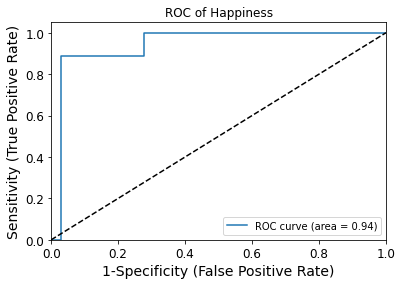

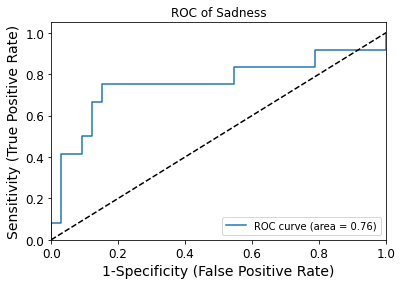

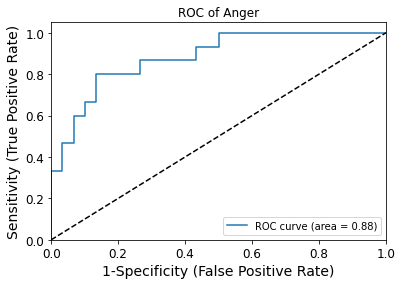

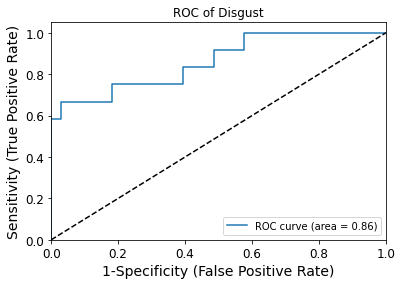

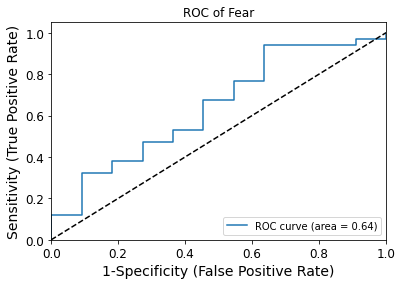

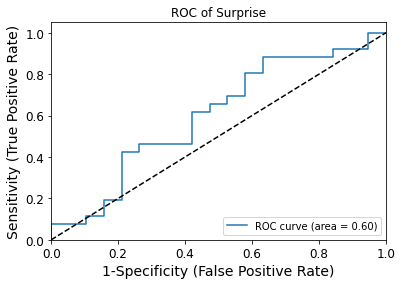

In [ ]:
from sklearn.metrics import hamming_loss, accuracy_score 

model= LinearSVC(C=1.0, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for emotion in emotions:
  y_score = model.fit(x_train_final, train[emotion]).decision_function(x_test_final)    
  fpr[emotion], tpr[emotion], _ = roc_curve(test[emotion], y_score)
  roc_auc[emotion] = auc(fpr[emotion], tpr[emotion])

# Plot of a ROC curve for a specific class
for emotion in emotions:
    plt.figure(figsize=(6, 4))
    plt.plot(fpr[emotion], tpr[emotion], label='ROC curve (area = %0.2f)' % roc_auc[emotion])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('1-Specificity (False Positive Rate)')
    plt.ylabel('Sensitivity (True Positive Rate)')
    plt.title('ROC of {}'.format(emotion.capitalize()))
    plt.legend(loc="lower right")
    plt.show()

# worst is surprise case, but at least it is >0.5=threshold

[Ruchi Toshniwal
](https://towardsdatascience.com/demystifying-roc-curves-df809474529a)


The diagonal line in the `ROC` curve represents a Random model (random classifier), and in this line the predicted probabilities of the respective classes overlap, in other words in this random model it is true that TPR=FPR for all the instances across this line. This line, therefore, represents the default threshold of 0.5 probability that an observation belongs to the right class. As a consequence, a classifier is considered better when (the bigger part of) its line belongs to the up and left side of the random model's line, i.e. when TPR>FPR and where misclassifications are fewer compared to the opposite case.

For the above reasons, the ROC curve is deemed to identify and demonstrate the trade-off between the false positives (and the corresponding TPR) and the false negatives observations (and the corresponding FPR), and a good classifier can achieve high TPR at low FPR levels.


The Area Under the Curve (`AUC`) ranges in value from 0 to 1, and it reflects an aggregate measure of a model's performance across all possible classification thresholds (a perfect classifier has AUC=1). As it can be understood, the more higher and left the ROC curve is for a model, the bigger the AUC that gets formulated. For this reason in the particular project, the emotion 'happiness' which seems to have the best formulated ROC curve, has AUC=0.88 and occupies by far the biggest AUC, while 'surprise' comes last with AUC=0.63. Overall, all emotions' AUC scores are bigger than 0.5 respectively, and the micro **(the "micro" parameter calculates metrics globally by considering each element of the label indicator matrix as a label, in contrast to the "macro" parameter, which based on the sklearn documentation it calculates the metrics for each label, and finds their unweighted mean, a fact which means that label imbalance is not taken into account [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html))** Area Under the Receiver Operating Characteristic Curve ( ROC AUC score) between the predicted and the true classes gives a score of 0.75. For these reasons it can be supported that this model can be able to satisfactorily  predict the emotions for the rest of the unlabelled dataset (emotions for 55,557 extra movies).

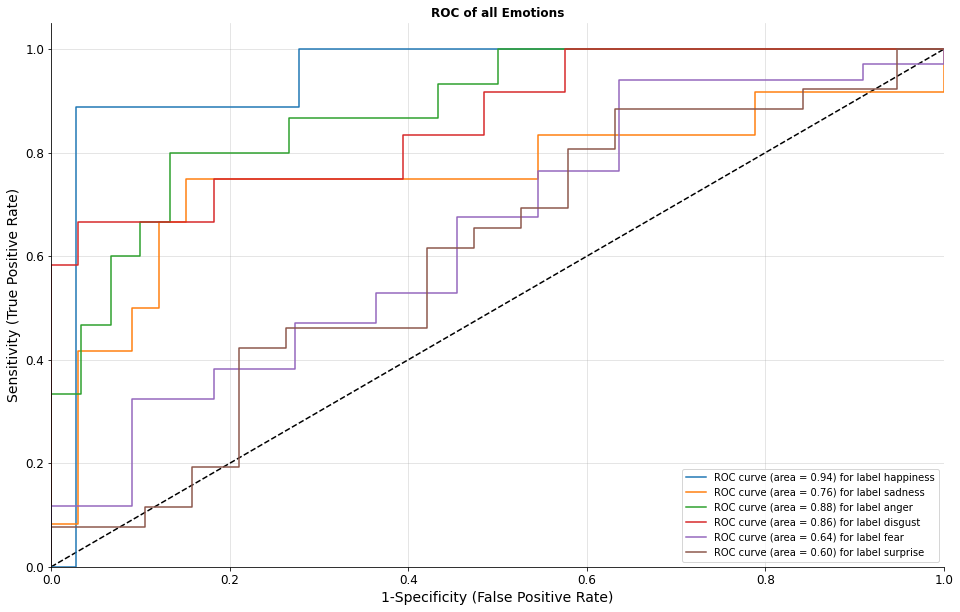

In [ ]:
model= LinearSVC(C=1.0, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)


def plot_roc(model, x_test, emotions,figsize=(17, 6)):

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for emotion in emotions:
      y_score = model.fit(x_train_final, train[emotion]).decision_function(x_test_final)
      fpr[emotion], tpr[emotion], _ = roc_curve(test[emotion], y_score)
      roc_auc[emotion] = auc(fpr[emotion], tpr[emotion])


    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('1-Specificity (False Positive Rate)')
    ax.set_ylabel('Sensitivity (True Positive Rate)')
    ax.set_title('ROC of all Emotions', fontweight="bold")
    for emotion in emotions:
        ax.plot(fpr[emotion], tpr[emotion], label='ROC curve (area = %0.2f) for label %s' % (roc_auc[emotion], emotion))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

plot_roc(model, x_test, emotions, figsize=(16, 10))

#  Predictions in Unlabelled Data & Latest Details

In [ ]:
emotions = ["happiness", "sadness", "anger", "disgust", "fear", "surprise"]

x_train= labelled_df[["overview", "Vader_polarity", "compound", "NMF_topic", "genres"]] 

x_test= unlabelled_df[["overview", "Vader_polarity", "compound", "NMF_topic", "genres"]] 

y_train= labelled_df[["happiness", "sadness", "anger", "disgust", "fear", "surprise"]]
y_test= unlabelled_df[["happiness", "sadness", "anger", "disgust", "fear", "surprise"]]

print("Shape of x_train is: {}".format(x_train.shape))
print("Shape of x_test is: {}".format(x_test.shape))
print("Shape of y_train is: {}".format(y_train.shape))
print("Shape of y_test is: {}".format(y_test.shape))

Shape of x_train is: (300, 5)
Shape of x_test is: (55577, 5)
Shape of y_train is: (300, 6)
Shape of y_test is: (55577, 6)


In [ ]:
# assigning the categorical variables

cat_var= ["Vader_polarity", "genres"]


# assigning the numerical variables
num_var= ["compound", "NMF_topic"]

# assigning the text attribute "overview"
text_var= ["overview"]

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

col_transformers= ColumnTransformer(
    transformers=[
                  ("stand_scal", StandardScaler(), num_var),
                  ("one_hot_enc", OneHotEncoder(handle_unknown='ignore'), cat_var),           
                  ]
)

In [ ]:
x_train_transformed= col_transformers.fit_transform(x_train)
x_train_transformed

<300x16 sparse matrix of type '<class 'numpy.float64'>'
	with 1200 stored elements in Compressed Sparse Row format>

In [ ]:
# setting min_df=2
# in this way less elements are stored in memory
from sklearn.feature_extraction.text import TfidfVectorizer
tfid_vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word',stop_words="english", ngram_range=(1,3), norm='l2', min_df=2)

In [ ]:
# fit_transform the train set
x_train_tfid = tfid_vectorizer.fit_transform(list(x_train["overview"]))
x_train_tfid

<300x1529 sparse matrix of type '<class 'numpy.float64'>'
	with 6505 stored elements in Compressed Sparse Row format>

In [ ]:
# sparse to array
x_train_transformed = x_train_transformed.toarray()
x_train_tfid= x_train_tfid.toarray()

In [ ]:
x_train_full_transformed= np.hstack((x_train_transformed, x_train_tfid)) 
x_train_full_transformed.shape

(300, 1545)

In [ ]:
# Transform the numerical and categorical tranformations in test set

x_test_transformed= col_transformers.transform(x_test)
x_test_transformed.shape

(55577, 16)

In [ ]:
# transform the tfid tranformations in test data

x_test_tfid= tfid_vectorizer.transform(list(x_test["overview"]))
x_test_tfid


<55577x1529 sparse matrix of type '<class 'numpy.float64'>'
	with 857643 stored elements in Compressed Sparse Row format>

In [ ]:
x_test_transformed = x_test_transformed.toarray()
x_test_tfid= x_test_tfid.toarray()

In [ ]:
x_test_full_transformed= np.hstack((x_test_transformed, x_test_tfid)) 
x_test_full_transformed.shape


(55577, 1545)

In [ ]:
x_train_final= x_train_full_transformed
x_test_final = x_test_full_transformed

In [ ]:
print("Shape of x_train_final is: {}".format(x_train_final.shape))
print("Shape of x_test_final is: {}".format(x_test_final.shape))
print("==============================================")
print("Shape of y_train is: {}".format(y_train.shape))
print("Shape of y_test is: {}".format(y_test.shape))

Shape of x_train_final is: (300, 1545)
Shape of x_test_final is: (55577, 1545)
Shape of y_train is: (300, 6)
Shape of y_test is: (55577, 6)


In [ ]:
# best model based on the previous sections, finding these
# parameters based on the grid search best parameters:
model= LinearSVC(C=1.0, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)


#model_metadata = "LinearSVC (with Grid Search)"

# iteration over emotions in y_val
count=1 

# saving predictions in a dataframe
predictions_binary_df = pd.DataFrame() 
predictions_decision_scores_df= pd.DataFrame() 

for emotion in emotions:
    print('{}:'.format(emotion))
    
    # Training model on train data
    model.fit(x_train_final, labelled_df[emotion])
    
    # Making predictions in validation data
    predictions_binary = model.predict(x_test_final)
    predictions_scores = model.decision_function(x_test_final)
    
    
    if count==1:
      predictions_binary_df["happiness"] = predictions_binary
      predictions_decision_scores_df["happiness"] = predictions_scores

      # assign the predictions in a new column
      # one column for the binary predictions
      # one column for the decision function scores
      unlabelled_df["happiness"] = predictions_binary
      unlabelled_df["happiness_scores"] = predictions_scores   
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==2:
      predictions_binary_df["sadness"] = predictions_binary
      predictions_decision_scores_df["sadness"] = predictions_scores

      # assign the predictions in a new column
      # one column for the binary predictions
      # one column for the decision function scores
      unlabelled_df["sadness"] = predictions_binary
      unlabelled_df["sadness_scores"] = predictions_scores   
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==3:
      predictions_binary_df["anger"] = predictions_binary
      predictions_decision_scores_df["anger"] = predictions_scores

      # assign the predictions in a new column
      # one column for the binary predictions
      # one column for the decision function scores
      unlabelled_df["anger"] = predictions_binary
      unlabelled_df["anger_scores"] = predictions_scores   
      print("--------------------------------------------------------------------------------------------------------------------------\n")


    elif count==4:
      predictions_binary_df["disgust"] = predictions_binary
      predictions_decision_scores_df["disgust"] = predictions_scores

      # assign the predictions in a new column
      # one column for the binary predictions
      # one column for the decision function scores
      unlabelled_df["disgust"] = predictions_binary
      unlabelled_df["disgust_scores"] = predictions_scores   
      print("--------------------------------------------------------------------------------------------------------------------------\n")

    

    elif count==5:
      predictions_binary_df["fear"] = predictions_binary
      predictions_decision_scores_df["fear"] = predictions_scores

      # assign the predictions in a new column
      # one column for the binary predictions
      # one column for the decision function scores
      unlabelled_df["fear"] = predictions_binary
      unlabelled_df["fear_scores"] = predictions_scores   
      print("--------------------------------------------------------------------------------------------------------------------------\n")

    else:
      predictions_binary_df["surprise"] = predictions_binary
      predictions_decision_scores_df["surprise"] = predictions_scores

      # assign the predictions in a new column
      # one column for the binary predictions
      # one column for the decision function scores
      unlabelled_df["surprise"] = predictions_binary
      unlabelled_df["surprise_scores"] = predictions_scores   
      print("--------------------------------------------------------------------------------------------------------------------------\n")

    count=count+1


happiness:
--------------------------------------------------------------------------------------------------------------------------

sadness:
--------------------------------------------------------------------------------------------------------------------------

anger:
--------------------------------------------------------------------------------------------------------------------------

disgust:
--------------------------------------------------------------------------------------------------------------------------

fear:
--------------------------------------------------------------------------------------------------------------------------

surprise:
--------------------------------------------------------------------------------------------------------------------------



In [ ]:
predictions_binary_df.head()

,happiness,sadness,anger,disgust,fear,surprise
0,0,0,0,0,0,1
1,0,1,1,0,1,0
2,0,0,1,1,1,0
3,1,0,0,0,0,1
4,0,1,0,0,1,1


In [ ]:
print(len(predictions_binary_df))
print(len(predictions_decision_scores_df))

55577
55577


In [ ]:
predictions_decision_scores_df.head()

,happiness,sadness,anger,disgust,fear,surprise
0,-0.277666,-0.260112,-0.411456,-0.638869,-0.000336,0.325651
1,-0.751311,0.356303,0.094258,-0.201592,0.834586,-0.185701
2,-0.809672,-0.375323,0.201113,0.133016,0.734580,-0.231303
3,0.178228,-0.811422,-0.593771,-0.790986,-0.082128,0.594236
4,-0.787442,0.392056,-0.279450,-0.264933,0.609438,0.215638


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1ab7d99908>,
      dtype=object)

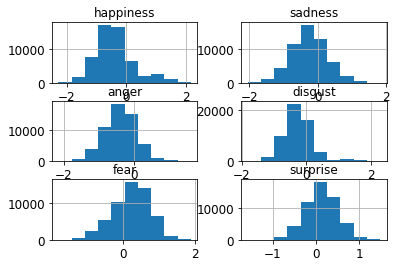

In [ ]:
predictions_decision_scores_df.hist()

In [ ]:
predictions_decision_scores_df.describe()

,happiness,sadness,anger,disgust,fear,surprise
count,55577.000000,55577.000000,55577.000000,55577.000000,55577.000000,55577.000000
mean,-0.401724,-0.251278,-0.402851,-0.256921,0.223966,0.132490
std,0.651372,0.515808,0.447829,0.453269,0.517134,0.363993
min,-2.278962,-2.046666,-2.145506,-1.816735,-1.806924,-1.575168
25%,-0.823328,-0.589464,-0.693089,-0.536049,-0.099160,-0.111498
50%,-0.478355,-0.262034,-0.391945,-0.284605,0.265467,0.133689
75%,-0.114876,0.079540,-0.109109,-0.031462,0.592043,0.379216
max,2.154663,1.815938,1.590637,2.275614,1.885591,1.484365


In [ ]:
unlabelled_df.shape

(55577, 25)

In [ ]:
# changing the name of "unlabelled_df" since now it is labelled through the model predictions
model_predictions_df = unlabelled_df
model_predictions_df.shape

(55577, 25)

In [ ]:
# 6 new columns
# each one reflecting the decision score assigned by the Linear SVClassifier
model_predictions_df.tail(20)

,movieId,tmdbId,title,genres,overview,Vader_polarity,compound,neg,neu,pos,NMF_topic,NMF_topic_description,entities,happiness,sadness,anger,disgust,fear,surprise,happiness_scores,sadness_scores,anger_scores,disgust_scores,fear_scores,surprise_scores
55557,209079,447225.0,call cute,anim,watch cat fail day cheer safeti remain invis n...,positive,0.2500,0.130,0.724,0.146,0,battl offenc,date,0,0,0,0,1,1,-0.569200,-0.275659,-0.344739,-0.077318,0.330890,0.309468
55558,209085,631420.0,mistleto secret,romanc,aria eubank convinc famous travel writer featu...,positive,0.1280,0.091,0.808,0.101,1,affair mysteri,person person org person,1,0,0,0,0,1,0.074141,-0.630209,-0.692098,-0.347405,-0.127566,0.663297
55559,209119,267635.0,world,comedi drama,david lori brother live small villag north ita...,neutral,0.0000,0.000,1.000,0.000,6,famili relat,person person gpe person date person cardin,0,0,0,1,1,1,-0.327575,-0.313790,-0.365148,0.304687,0.004707,0.567207
55560,209121,312911.0,adrenalin bmw tour car stori,documentari,adrenalin bring excit success bmw tour car sto...,positive,0.9670,0.000,0.787,0.213,4,school colleg,org date date cardin ordin org product org,0,1,0,0,1,0,-0.196654,0.506885,-0.824135,-0.048775,0.216115,-0.674736
55561,209123,341531.0,squar root stori spongebob squarep,documentari,commemor th anniversari spongebob squarep docu...,positive,0.5106,0.000,0.891,0.109,5,war crime,ordin work art,0,1,0,0,0,0,-0.668163,0.069174,-0.672657,-0.945812,-0.327105,-0.185069
55562,209129,421074.0,destin titan,documentari,stori british scientist creat probe take year ...,positive,0.1764,0.049,0.887,0.064,2,autobiographi storytel,cardin norp date product org quantiti work art...,0,0,0,0,0,0,-0.867686,-0.354481,-0.282408,-0.497196,-0.106430,-0.232823
55563,209131,113037.0,last day arctic,documentari,iceland photograph record vanish lifestyl peop...,neutral,0.0000,0.000,1.000,0.000,0,battl offenc,norp,0,0,0,0,0,0,-0.713740,-0.244295,-0.526147,-0.254853,-0.308441,-0.307736
55564,209135,53028.0,jane b agn v,documentari fantasi,portrait actress jane birkin,neutral,0.0000,0.000,1.000,0.000,2,autobiographi storytel,person,0,0,1,0,0,0,-0.315963,-0.289821,0.043039,-0.389987,-0.015953,-0.028607
55565,209137,148249.0,reward man mine,western,alcohol gunman hunt pitiless bounti hunter she...,negative,-0.8860,0.271,0.614,0.115,0,battl offenc,cardin,0,0,1,0,1,0,-1.482440,-0.473739,1.004041,-0.553373,1.055968,-1.084677
55566,209139,71030.0,rimski korsakov,drama,biograph film compos rimskiy korsakov belong g...,neutral,0.0000,0.000,1.000,0.000,2,autobiographi storytel,person gpe date norp,0,1,0,0,1,1,-0.838190,0.850132,-0.712960,-0.619560,0.145994,0.150720


In [ ]:
model_predictions_df.describe()

,movieId,tmdbId,compound,neg,neu,pos,NMF_topic,happiness,sadness,anger,disgust,fear,surprise,happiness_scores,sadness_scores,anger_scores,disgust_scores,fear_scores,surprise_scores
count,55577.000000,55577.000000,55577.000000,55577.000000,55577.000000,55577.000000,55577.000000,55577.000000,55577.000000,55577.000000,55577.000000,55577.000000,55577.000000,55577.000000,55577.000000,55577.000000,55577.000000,55577.000000,55577.000000
mean,118641.070803,148146.577793,-0.057024,0.114650,0.786672,0.098641,2.506343,0.193659,0.301078,0.174479,0.226011,0.691959,0.644619,-0.401724,-0.251278,-0.402851,-0.256921,0.223966,0.132490
std,64378.914869,152864.549695,0.631729,0.099972,0.115932,0.087749,2.146121,0.395169,0.458731,0.379524,0.418250,0.461688,0.478633,0.651372,0.515808,0.447829,0.453269,0.517134,0.363993
min,1.000000,2.000000,-0.996700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.278962,-2.046666,-2.145506,-1.816735,-1.806924,-1.575168
25%,74266.000000,33031.000000,-0.664700,0.033000,0.714000,0.024000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.823328,-0.589464,-0.693089,-0.536049,-0.099160,-0.111498
50%,133465.000000,79721.000000,0.000000,0.100000,0.790000,0.087000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-0.478355,-0.262034,-0.391945,-0.284605,0.265467,0.133689
75%,172163.000000,242409.000000,0.542300,0.173000,0.863000,0.148000,4.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,-0.114876,0.079540,-0.109109,-0.031462,0.592043,0.379216
max,209171.000000,646282.000000,0.995500,0.853000,1.000000,0.758000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.154663,1.815938,1.590637,2.275614,1.885591,1.484365


In [ ]:
model_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55577 entries, 0 to 55576
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   movieId                55577 non-null  int64   
 1   tmdbId                 55577 non-null  float64 
 2   title                  55577 non-null  category
 3   genres                 55577 non-null  category
 4   overview               55577 non-null  object  
 5   Vader_polarity         55577 non-null  category
 6   compound               55577 non-null  float64 
 7   neg                    55577 non-null  float64 
 8   neu                    55577 non-null  float64 
 9   pos                    55577 non-null  float64 
 10  NMF_topic              55577 non-null  int64   
 11  NMF_topic_description  55577 non-null  category
 12  entities               55577 non-null  category
 13  happiness              55577 non-null  int64   
 14  sadness                55577 non-null 

In [ ]:
model_predictions_df["happiness"] = model_predictions_df["happiness"].astype(int)
model_predictions_df["sadness"] = model_predictions_df["sadness"].astype(int)
model_predictions_df["anger"] = model_predictions_df["anger"].astype(int)
model_predictions_df["disgust"] = model_predictions_df["disgust"].astype(int)
model_predictions_df["fear"] = model_predictions_df["fear"].astype(int)
model_predictions_df["surprise"] = model_predictions_df["surprise"].astype(int)

In [ ]:
model_predictions_df.iloc[:,13:19].head(1)

,happiness,sadness,anger,disgust,fear,surprise
0,0,0,0,0,0,1


In [ ]:
model_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55577 entries, 0 to 55576
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   movieId                55577 non-null  int64   
 1   tmdbId                 55577 non-null  float64 
 2   title                  55577 non-null  category
 3   genres                 55577 non-null  category
 4   overview               55577 non-null  object  
 5   Vader_polarity         55577 non-null  category
 6   compound               55577 non-null  float64 
 7   neg                    55577 non-null  float64 
 8   neu                    55577 non-null  float64 
 9   pos                    55577 non-null  float64 
 10  NMF_topic              55577 non-null  int64   
 11  NMF_topic_description  55577 non-null  category
 12  entities               55577 non-null  category
 13  happiness              55577 non-null  int64   
 14  sadness                55577 non-null 

In [ ]:
# number to which the model "broke" the role
# the model assigned both happiness and sadness emotion 1401 times
# these are fixed below:
# in the occurence of that, if happiness' score is greater than that of sadness, then
# sadness=0 and happiness=, and vice versa

data=[]
for row in model_predictions_df.itertuples(index=True, name='Pandas'):
  if row.happiness==1 and row.sadness==1:
    data.append([row.movieId])

df = pd.DataFrame(data, columns=['movieId'])
df.shape

# 1401/ 55,577 => an error of 2.5% in terms of sample's total size

(1401, 1)

In [ ]:
model_predictions_df.tail(20)

,movieId,tmdbId,title,genres,overview,Vader_polarity,compound,neg,neu,pos,NMF_topic,NMF_topic_description,entities,happiness,sadness,anger,disgust,fear,surprise,happiness_scores,sadness_scores,anger_scores,disgust_scores,fear_scores,surprise_scores
55557,209079,447225.0,call cute,anim,watch cat fail day cheer safeti remain invis n...,positive,0.2500,0.130,0.724,0.146,0,battl offenc,date,0,0,0,0,1,1,-0.569200,-0.275659,-0.344739,-0.077318,0.330890,0.309468
55558,209085,631420.0,mistleto secret,romanc,aria eubank convinc famous travel writer featu...,positive,0.1280,0.091,0.808,0.101,1,affair mysteri,person person org person,1,0,0,0,0,1,0.074141,-0.630209,-0.692098,-0.347405,-0.127566,0.663297
55559,209119,267635.0,world,comedi drama,david lori brother live small villag north ita...,neutral,0.0000,0.000,1.000,0.000,6,famili relat,person person gpe person date person cardin,0,0,0,1,1,1,-0.327575,-0.313790,-0.365148,0.304687,0.004707,0.567207
55560,209121,312911.0,adrenalin bmw tour car stori,documentari,adrenalin bring excit success bmw tour car sto...,positive,0.9670,0.000,0.787,0.213,4,school colleg,org date date cardin ordin org product org,0,1,0,0,1,0,-0.196654,0.506885,-0.824135,-0.048775,0.216115,-0.674736
55561,209123,341531.0,squar root stori spongebob squarep,documentari,commemor th anniversari spongebob squarep docu...,positive,0.5106,0.000,0.891,0.109,5,war crime,ordin work art,0,1,0,0,0,0,-0.668163,0.069174,-0.672657,-0.945812,-0.327105,-0.185069
55562,209129,421074.0,destin titan,documentari,stori british scientist creat probe take year ...,positive,0.1764,0.049,0.887,0.064,2,autobiographi storytel,cardin norp date product org quantiti work art...,0,0,0,0,0,0,-0.867686,-0.354481,-0.282408,-0.497196,-0.106430,-0.232823
55563,209131,113037.0,last day arctic,documentari,iceland photograph record vanish lifestyl peop...,neutral,0.0000,0.000,1.000,0.000,0,battl offenc,norp,0,0,0,0,0,0,-0.713740,-0.244295,-0.526147,-0.254853,-0.308441,-0.307736
55564,209135,53028.0,jane b agn v,documentari fantasi,portrait actress jane birkin,neutral,0.0000,0.000,1.000,0.000,2,autobiographi storytel,person,0,0,1,0,0,0,-0.315963,-0.289821,0.043039,-0.389987,-0.015953,-0.028607
55565,209137,148249.0,reward man mine,western,alcohol gunman hunt pitiless bounti hunter she...,negative,-0.8860,0.271,0.614,0.115,0,battl offenc,cardin,0,0,1,0,1,0,-1.482440,-0.473739,1.004041,-0.553373,1.055968,-1.084677
55566,209139,71030.0,rimski korsakov,drama,biograph film compos rimskiy korsakov belong g...,neutral,0.0000,0.000,1.000,0.000,2,autobiographi storytel,person gpe date norp,0,1,0,0,1,1,-0.838190,0.850132,-0.712960,-0.619560,0.145994,0.150720


In [ ]:
for row in model_predictions_df.itertuples():
  if row.happiness == 1 and row.sadness ==1:
    if row.happiness_scores > row.sadness_scores:
      model_predictions_df.at[row.Index, "sadness"] = 0
    else:
      model_predictions_df.at[row.Index, "happiness"] = 0

In [ ]:
data=[]
for row in model_predictions_df.itertuples(index=True, name='Pandas'):
  if row.happiness==1 and row.sadness==1:
    data.append([row.movieId, row.happiness, row.sadness, row.happiness_scores, row.sadness_scores])

df = pd.DataFrame(data, columns=['movieId',"happiness", "sadness", "happiness_scores", "sadness_scores"])
df.shape
# 0 rows found, so the error was fixed/replaced with the appropriate values

(0, 5)

In [ ]:
model_predictions_df.tail(10)

,movieId,tmdbId,title,genres,overview,Vader_polarity,compound,neg,neu,pos,NMF_topic,NMF_topic_description,entities,happiness,sadness,anger,disgust,fear,surprise,happiness_scores,sadness_scores,anger_scores,disgust_scores,fear_scores,surprise_scores
55567,209141,349082.0,live happili ever after,comedi,manoli fernando coupl communist idea want live...,positive,0.9001,0.040,0.670,0.289,3,relationship marriag,gpe person norp ordin,1,0,0,0,0,1,1.482673,-1.287224,-1.086831,-0.832077,-1.098700,0.459787
55568,209143,646282.0,paint,anim documentari,half centuri day diego vel zquez appli last br...,positive,0.0516,0.063,0.870,0.067,2,autobiographi storytel,date date gpe cardin product work art work art...,0,0,0,0,1,0,-0.849697,-0.531089,-0.474234,-0.478050,0.108997,-0.250345
55569,209145,595924.0,libert,drama,short french revolut somewher potsdam berlin m...,positive,0.5346,0.104,0.754,0.142,5,war crime,date event gpe gpe person fac norp org person ...,0,1,0,0,1,1,0.056984,0.354865,-0.798455,-0.455874,0.103755,0.271370
55570,209147,176524.0,carpet horror,crime horror,evil genius use poison gas aveng enemi,negative,-0.9022,0.552,0.448,0.000,0,battl offenc,none,0,0,1,1,1,1,-0.819798,-0.456544,0.393283,0.071379,0.714824,0.209826
55571,209153,18733.0,happi flight,comedi drama,co pilot kazuhiro tanab seiichi promot get cap...,positive,0.9569,0.042,0.788,0.170,0,battl offenc,person person person person person ordin,0,0,0,0,0,1,-0.038203,-0.920238,-0.612087,-0.619579,-0.043545,0.575683
55572,209155,63813.0,santosh subramaniam,action comedi romanc,film begin babi take initi step beach father s...,negative,-0.7469,0.094,0.833,0.073,6,famili relat,org date person person person person cardin,0,1,1,1,1,1,-1.035493,0.161184,0.127283,0.444999,0.348518,0.189862
55573,209157,499546.0,we,drama,scorch summer belgian dutch border villag teen...,positive,0.3818,0.090,0.765,0.145,0,battl offenc,date norp cardin,0,1,0,1,1,1,-0.019807,0.486755,-0.820117,0.065113,0.205439,0.589266
55574,209159,63407.0,window soul,documentari,nineteen peopl differ degre visual impair mild...,positive,0.2732,0.036,0.907,0.057,5,war crime,cardin,0,0,0,0,0,1,-0.469930,-0.307417,-0.688928,-0.321104,-0.512537,0.133304
55575,209163,553036.0,bad poem,comedi drama,year old tam merthner heartbroken girlfriend a...,negative,-0.4751,0.094,0.852,0.054,3,relationship marriag,person person gpe person gpe,0,0,0,0,1,1,-0.653414,-0.242198,-0.187862,-0.119620,0.645977,0.746632
55576,209171,79513.0,women devil island,action adventur drama,italian costum drama convict women franc sent ...,negative,-0.7618,0.090,0.882,0.029,4,school colleg,norp gpe loc time person,0,0,0,1,1,0,-1.177875,-0.336113,-0.354212,0.022328,0.865058,-0.089595


In [ ]:
model_predictions_df.shape

(55577, 25)

# Visualization

## Emotion Labelling (300 Movies)

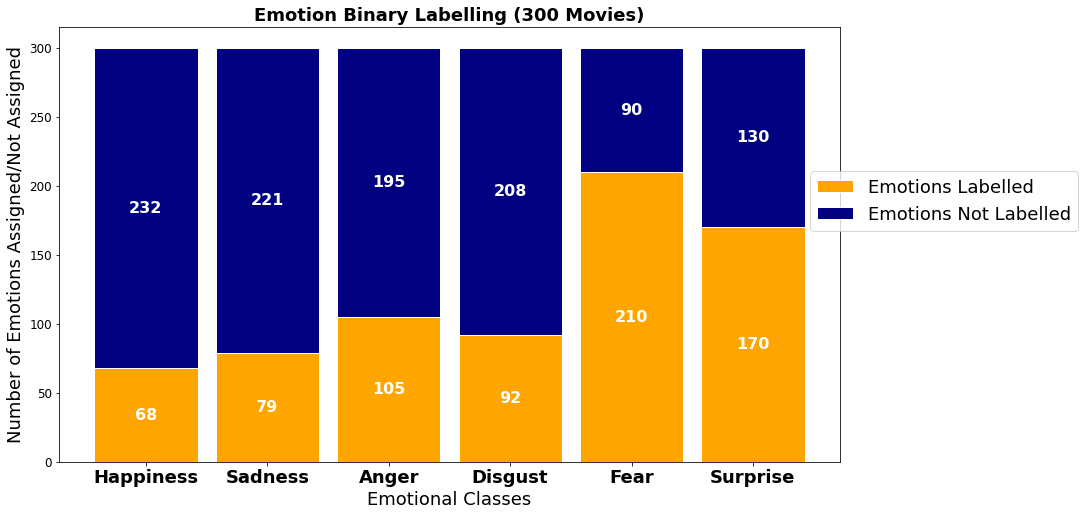

In [ ]:
# https://medium.com/@priteshbgohil/stacked-bar-chart-in-python-ddc0781f7d5f
import matplotlib.pyplot as plt

labels = ["Happiness", "Sadness", "Anger", "Disgust", "Fear", "Surprise"]

#not assigned
emotions_not_labelled = (labelled_df['happiness'].value_counts()[0].tolist(),
              labelled_df['sadness'].value_counts()[0].tolist(),
              labelled_df['anger'].value_counts()[0].tolist(),
              labelled_df['disgust'].value_counts()[0].tolist(),
              labelled_df['fear'].value_counts()[0].tolist(),
              labelled_df['surprise'].value_counts()[0].tolist()
              )

# assigned
emotions_labelled = (labelled_df['happiness'].value_counts()[1].tolist(),
              labelled_df['sadness'].value_counts()[1].tolist(),
              labelled_df['anger'].value_counts()[1].tolist(),
              labelled_df['disgust'].value_counts()[1].tolist(),
              labelled_df['fear'].value_counts()[1].tolist(),
              labelled_df['surprise'].value_counts()[1].tolist()
              )
    
colors = ["orange", "navy"]
# The position of the bars on the x-axis
r = range(len(labels))
barWidth = 0.85

plt.figure(figsize=(14,8))
ax1 = plt.bar(r, emotions_labelled, color=colors[0], edgecolor='white', width=barWidth, label="Emotions Labelled")
ax2 = plt.bar(r, emotions_not_labelled, bottom=np.array(emotions_labelled), color=colors[1], edgecolor='white', width=barWidth, label='Emotions Not Labelled')

plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.6), fontsize=18)

plt.xticks(r, labels, fontweight='bold',fontsize=18)
plt.ylabel("Number of Emotions Assigned/Not Assigned", fontsize=18)
plt.title("Emotion Binary Labelling (300 Movies)", fontsize=18, fontweight= "bold")
plt.xlabel("Emotional Classes", fontsize=18)
for r1, r2 in zip(ax1, ax2):
    h1 = r1.get_height()
    h2 = r2.get_height()
    
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., "%d" % h1, ha="center", va="center", color="white", fontsize=16, fontweight="bold")
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., "%d" % h2, ha="center", va="center", color="white", fontsize=16, fontweight="bold")
#plt.savefig("?.png")
plt.show()

## Prediction of Emotions in 55,577 Movies

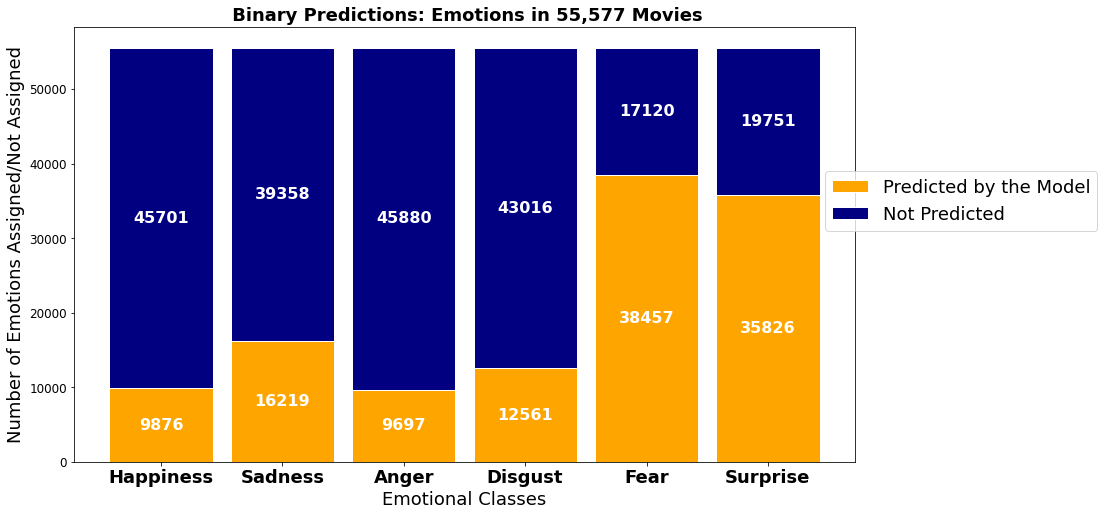

In [ ]:
'''
# https://medium.com/@priteshbgohil/stacked-bar-chart-in-python-ddc0781f7d5f
import matplotlib.pyplot as plt

labels = ["Happiness", "Sadness", "Anger", "Disgust", "Fear", "Surprise"]

#not assigned
emotions_not_predicted = (model_predictions_df['happiness'].value_counts()[0].tolist(),
              model_predictions_df['sadness'].value_counts()[0].tolist(),
              model_predictions_df['anger'].value_counts()[0].tolist(),
              model_predictions_df['disgust'].value_counts()[0].tolist(),
              model_predictions_df['fear'].value_counts()[0].tolist(),
              model_predictions_df['surprise'].value_counts()[0].tolist()
              )

# assigned
emotions_predicted = (model_predictions_df['happiness'].value_counts()[1].tolist(),
              model_predictions_df['sadness'].value_counts()[1].tolist(),
              model_predictions_df['anger'].value_counts()[1].tolist(),
              model_predictions_df['disgust'].value_counts()[1].tolist(),
              model_predictions_df['fear'].value_counts()[1].tolist(),
              model_predictions_df['surprise'].value_counts()[1].tolist()
              )
    
colors = ["orange", "navy"]
# The position of the bars on the x-axis
r = range(len(labels))
barWidth = 0.85

plt.figure(figsize=(14,8))
ax1 = plt.bar(r, emotions_predicted, color=colors[0], edgecolor='white', width=barWidth, label="Predicted by the Model")
ax2 = plt.bar(r, emotions_not_predicted, bottom=np.array(emotions_predicted), color=colors[1], edgecolor='white', width=barWidth, label='Not Predicted')

plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.6), fontsize=18)

plt.xticks(r, labels, fontweight='bold',fontsize=18)
plt.ylabel("Number of Emotions Assigned/Not Assigned", fontsize=18)
plt.title("Predictions of Emotions in 55,577 Movies", fontsize=18, fontweight= "bold")
plt.xlabel("Emotional Classes", fontsize=18)
for r1, r2 in zip(ax1, ax2):
    h1 = r1.get_height()
    h2 = r2.get_height()
    
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., "%d" % h1, ha="center", va="center", color="white", fontsize=16, fontweight="bold")
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., "%d" % h2, ha="center", va="center", color="white", fontsize=16, fontweight="bold")
#plt.savefig("?.png")
plt.show()
'''
# https://medium.com/@priteshbgohil/stacked-bar-chart-in-python-ddc0781f7d5f
import matplotlib.pyplot as plt

labels = ["Happiness", "Sadness", "Anger", "Disgust", "Fear", "Surprise"]

#not assigned
emotions_not_predicted = (model_predictions_df['happiness'].value_counts()[0].tolist(),
              model_predictions_df['sadness'].value_counts()[0].tolist(),
              model_predictions_df['anger'].value_counts()[0].tolist(),
              model_predictions_df['disgust'].value_counts()[0].tolist(),
              model_predictions_df['fear'].value_counts()[0].tolist(),
              model_predictions_df['surprise'].value_counts()[0].tolist()
              )

# assigned
emotions_predicted = (model_predictions_df['happiness'].value_counts()[1].tolist(),
              model_predictions_df['sadness'].value_counts()[1].tolist(),
              model_predictions_df['anger'].value_counts()[1].tolist(),
              model_predictions_df['disgust'].value_counts()[1].tolist(),
              model_predictions_df['fear'].value_counts()[1].tolist(),
              model_predictions_df['surprise'].value_counts()[1].tolist()
              )
    
colors = ["orange", "navy"]
# The position of the bars on the x-axis
r = range(len(labels))
barWidth = 0.85

plt.figure(figsize=(14,8))
ax1 = plt.bar(r, emotions_predicted, color=colors[0], edgecolor='white', width=barWidth, label="Predicted by the Model")
ax2 = plt.bar(r, emotions_not_predicted, bottom=np.array(emotions_predicted), color=colors[1], edgecolor='white', width=barWidth, label='Not Predicted')

plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.6), fontsize=18)

plt.xticks(r, labels, fontweight='bold',fontsize=18)
plt.ylabel("Number of Emotions Assigned/Not Assigned", fontsize=18)
plt.title(" Binary Predictions: Emotions in 55,577 Movies", fontsize=18, fontweight="bold")
plt.xlabel("Emotional Classes", fontsize=18)
for r1, r2 in zip(ax1, ax2):
    h1 = r1.get_height()
    h2 = r2.get_height()
    
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., "%d" % h1, ha="center", va="center", color="white", fontsize=16, fontweight="bold")
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., "%d" % h2, ha="center", va="center", color="white", fontsize=16, fontweight="bold")
#plt.savefig("?.png")
plt.show()

In [ ]:
unlabelled_df.iloc[:,13:19]

,happiness,sadness,anger,disgust,fear,surprise
0,0,0,0,0,0,1
1,0,1,1,0,1,0
2,0,0,1,1,1,0
3,1,0,0,0,0,1
4,0,1,0,0,1,1
...,...,...,...,...,...,...
55572,0,1,1,1,1,1
55573,0,1,0,1,1,1
55574,0,0,0,0,0,1
55575,0,0,0,0,1,1


## Combination of Emotions per Movie in 55,777 Movies

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


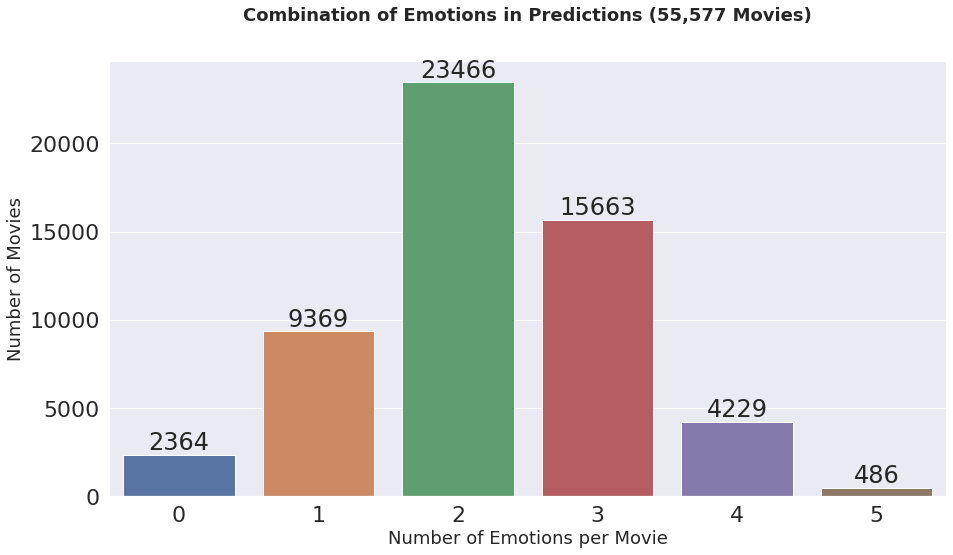

In [ ]:
# calculating number of overviews having multiple emotions

# if 1 for both happiness and sadness, then 1 to the one with the highest decision score


rowSums = unlabelled_df.iloc[:,13:19].sum(axis=1,skipna=True)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[0:]

sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)

plt.title("Combination of Emotions in Predictions (55,577 Movies)", fontsize=18, y=1.08, fontweight="bold")
plt.ylabel('Number of Movies', fontsize=18)
plt.xlabel('Number of Emotions per Movie', fontsize=18)

#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, '%d' % int(height), ha='center', va='bottom')

plt.show()
# 7 movies had no emotion

In [ ]:
# calculating the number of movies which have no emotion displaying
data=[]
for row in model_predictions_df.itertuples(index=True, name='Pandas'):
  if row.happiness==0 and row.sadness==0 and row.anger==0 and row.disgust==0 and row.fear==0 and row.surprise==0:
    data.append([row.movieId, row.happiness, row.sadness, row.happiness_scores, row.sadness_scores])

df = pd.DataFrame(data, columns=['movieId',"happiness", "sadness", "happiness_scores", "sadness_scores"])
df.shape
# hence, 2364 movies have any emotion displayed

(2364, 5)

## Percentage of Emotions Predicted

### 300 Labelled Movies

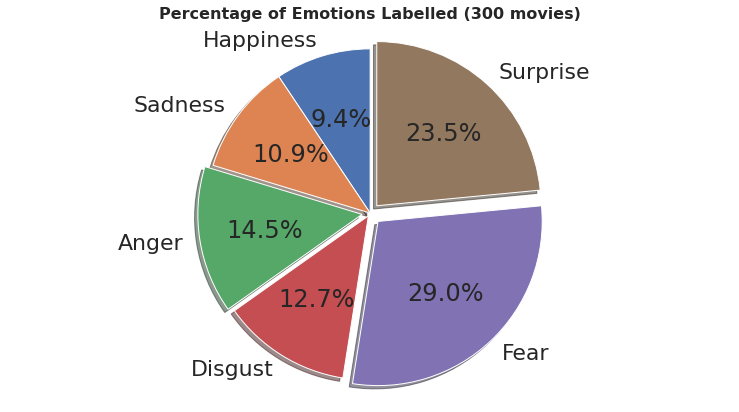

'\nin the 300 labelled movies the order was:\n\n1) fear\n2) surprise\n3) anger\n4) disgust\n5) sadness\n6) happiness\n\nwhile in the predicted movies (unlabelled dataframe), the order is:\n\n1) surprise\n2) fear\n3) sadness\n4) happiness\n5) disgust\n6) anger\n\n'

In [ ]:
labels = ["Happiness", "Sadness", "Anger", "Disgust", "Fear", "Surprise"]

sizes = (labelled_df['happiness'].value_counts()[1].tolist(),
              labelled_df['sadness'].value_counts()[1].tolist(),
              labelled_df['anger'].value_counts()[1].tolist(),
              labelled_df['disgust'].value_counts()[1].tolist(),
              labelled_df['fear'].value_counts()[1].tolist(),
              labelled_df['surprise'].value_counts()[1].tolist()
              )

explode = (0, 0, 0.05, 0.02, 0.07, 0.06)  # only "explode" the 2nd slice (i.e. 'Hogs')

figure, ax1 = plt.subplots()
figure.set_size_inches(13,7)
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Percentage of Emotions Labelled (300 movies)", fontsize=16, fontweight="bold")

plt.show()
# the order has changed for all emotions apart from happiness which is the least assigned emotion

'''
in the 300 labelled movies the order was:

1) fear
2) surprise
3) anger
4) disgust
5) sadness
6) happiness

while in the predicted movies (unlabelled dataframe), the order is:

1) surprise
2) fear
3) sadness
4) happiness
5) disgust
6) anger

'''


### In 55,577 Predicted

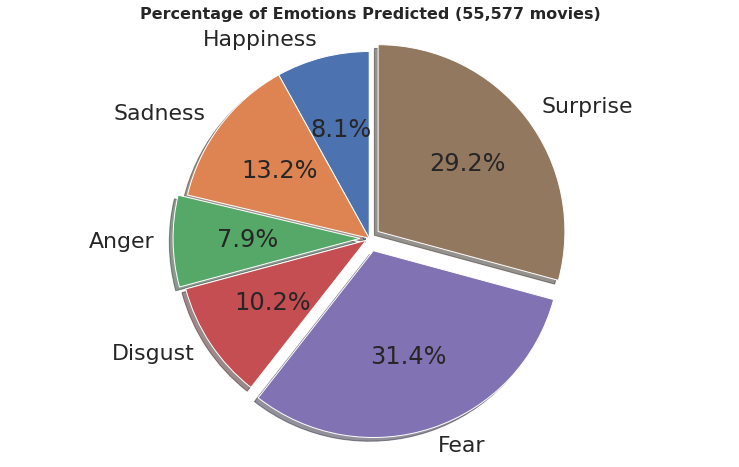

In [ ]:
labels = ["Happiness", "Sadness", "Anger", "Disgust", "Fear", "Surprise"]

sizes = (model_predictions_df['happiness'].value_counts()[1].tolist(),
              model_predictions_df['sadness'].value_counts()[1].tolist(),
              model_predictions_df['anger'].value_counts()[1].tolist(),
              model_predictions_df['disgust'].value_counts()[1].tolist(),
              model_predictions_df['fear'].value_counts()[1].tolist(),
              model_predictions_df['surprise'].value_counts()[1].tolist()
              )

explode = (0, 0, 0.05, 0.02, 0.07, 0.06)  # only "explode" the 2nd slice (i.e. 'Hogs')

figure, ax1 = plt.subplots()
figure.set_size_inches(13,8)
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Percentage of Emotions Predicted (55,577 movies)", fontsize=16, fontweight="bold")

plt.show()

In [ ]:
predictions_decision_scores_df.shape

(55577, 6)

In [ ]:
predictions_decision_scores_df.isnull().sum().any()

False

In [ ]:
# extracting the predictions (decision scores) into a csv file in order to edit it in the hypothesis tests ipynb notebook

# extracting the models_predictions_df which encompasses those, as well as the binary predictions, plus all other
# linked movie metadata
'''
from google.colab import files


predictions_decision_scores_df.to_csv('predictions_decision_scores_df.csv', index=False)
files.download('predictions_decision_scores_df.csv')

model_predictions_df.to_csv('model_predictions_df.csv', index=False)
files.download('model_predictions_df.csv')
'''

"\nfrom google.colab import files\n\n\npredictions_decision_scores_df.to_csv('predictions_decision_scores_df.csv', index=False)\nfiles.download('predictions_decision_scores_df.csv')\n\nmodel_predictions_df.to_csv('model_predictions_df.csv', index=False)\nfiles.download('model_predictions_df.csv')\n"

### Wordcloud of Unlabelled Dataframe

In [ ]:
movies_final_3.shape

(55877, 17)

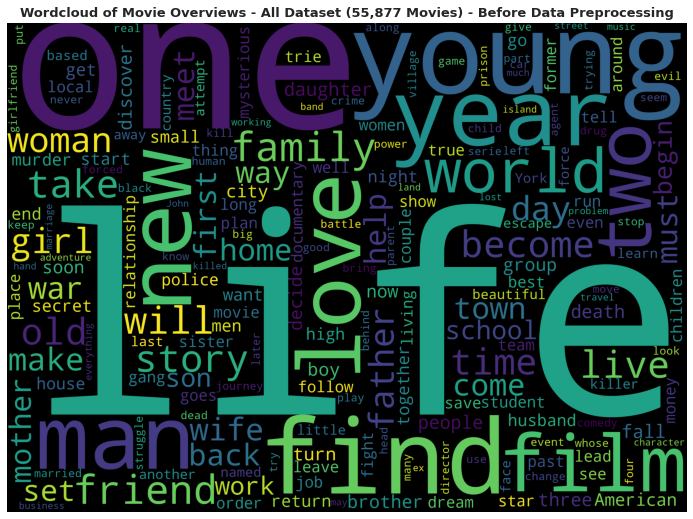

In [ ]:
from wordcloud import WordCloud,STOPWORDS

plt.figure(figsize=(15,9))
# clean
subset = movies_final_3
text = subset.overview.values
cloud_general = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))
plt.axis('off')
plt.title("Wordcloud of Movie Overviews - All Dataset (55,877 Movies) - Before Data Preprocessing",fontsize=13, fontweight="bold")
plt.imshow(cloud_general)


### Wordcloud of Emotions In Unlabelled Dataframe (With the predicted emotions)

In [ ]:
model_predictions_df.shape

(55577, 25)

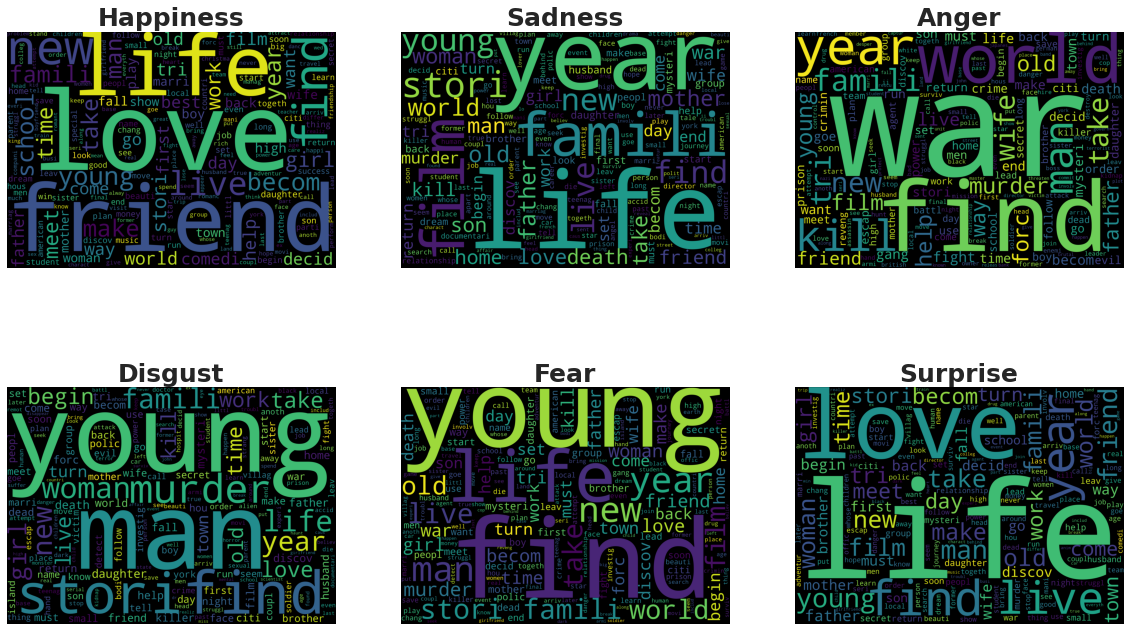

In [ ]:
from wordcloud import WordCloud,STOPWORDS

plt.figure(figsize=(20,12))

# happiness
subset = model_predictions_df[model_predictions_df.happiness==1]
overviews = subset.overview.values
cloud_happiness = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(overviews))

plt.subplot(2, 3, 1)
plt.axis('off')
plt.title("Happiness", fontsize=25, fontweight= "bold")
plt.imshow(cloud_happiness)


# sadness
subset = model_predictions_df[model_predictions_df.sadness==1]
overviews = subset.overview.values
cloud_sadness = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(overviews))

plt.subplot(2, 3, 2)
plt.axis('off')
plt.title("Sadness", fontsize=25, fontweight= "bold")
plt.imshow(cloud_sadness)


# anger
subset = model_predictions_df[model_predictions_df.anger==1]
overviews = subset.overview.values
cloud_anger = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(overviews))

plt.subplot(2, 3, 3)
plt.axis('off')
plt.title("Anger", fontsize=25, fontweight= "bold")
plt.imshow(cloud_anger)


# disgust
subset = model_predictions_df[model_predictions_df.disgust==1]
overviews = subset.overview.values
cloud_disgust = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(overviews))

plt.subplot(2, 3, 4)
plt.axis('off')
plt.title("Disgust", fontsize=25, fontweight= "bold")
plt.imshow(cloud_disgust)


# fear
subset = model_predictions_df[model_predictions_df.fear==1]
overviews = subset.overview.values
cloud_fear = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(overviews))

plt.subplot(2, 3, 5)
plt.axis('off')
plt.title("Fear", fontsize=25, fontweight= "bold")
plt.imshow(cloud_fear)


# surprise
subset = model_predictions_df[model_predictions_df.surprise==1]
overviews = subset.overview.values
cloud_surprise = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(overviews))

plt.subplot(2, 3, 6)
plt.axis('off')
plt.title("Surprise",fontsize=25, fontweight= "bold")
plt.imshow(cloud_surprise)

plt.show()

# Normalization of Desicion Function Confidence Scores for Applying Intensity Graduation

Normalizing the the emotions' confidence scores for those scores that are greater than 0, i.e. those than in a binary form are "1" (displayed/appeared emotion) and not "0" (not displayed/appeared)

In [ ]:
predictions_decision_scores_df.head()

,happiness,sadness,anger,disgust,fear,surprise
0,-0.277666,-0.260112,-0.411456,-0.638869,-0.000336,0.325651
1,-0.751311,0.356303,0.094258,-0.201592,0.834586,-0.185701
2,-0.809672,-0.375323,0.201113,0.133016,0.734580,-0.231303
3,0.178228,-0.811422,-0.593771,-0.790986,-0.082128,0.594236
4,-0.787442,0.392056,-0.279450,-0.264933,0.609438,0.215638


In [ ]:
predictions_decision_scores_df.shape

(55577, 6)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

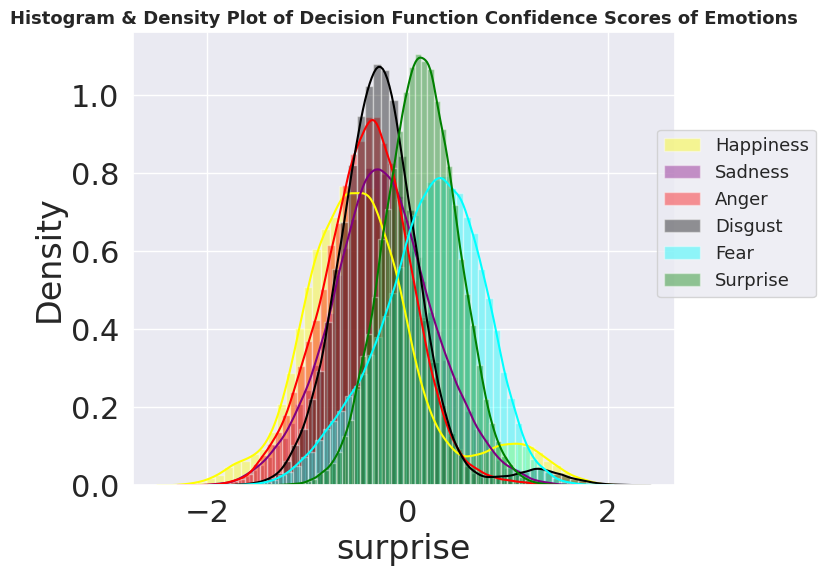

In [ ]:
import seaborn as sns
df = predictions_decision_scores_df

plt.subplots(figsize=(7,6), dpi=100)
sns.distplot( df["happiness"], color="yellow", label="Happiness")
sns.distplot( df["sadness"], color="purple", label="Sadness")
sns.distplot( df["anger"] , color="red", label="Anger")
sns.distplot( df["disgust"] , color="black", label="Disgust")
sns.distplot( df["fear"] , color="aqua", label="Fear")
sns.distplot( df["surprise"] , color="green", label="Surprise")

plt.title('Histogram & Density Plot of Decision Function Confidence Scores of Emotions', fontsize=13, fontweight="bold")
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.6), fontsize=13)


In [ ]:
predictions_decision_scores_df.shape

(55577, 6)

In [ ]:
predictions_decision_scores_df.head()

,happiness,sadness,anger,disgust,fear,surprise
0,-0.277666,-0.260112,-0.411456,-0.638869,-0.000336,0.325651
1,-0.751311,0.356303,0.094258,-0.201592,0.834586,-0.185701
2,-0.809672,-0.375323,0.201113,0.133016,0.734580,-0.231303
3,0.178228,-0.811422,-0.593771,-0.790986,-0.082128,0.594236
4,-0.787442,0.392056,-0.279450,-0.264933,0.609438,0.215638


In [ ]:
data_happiness=[]
data_sadness=[]
data_anger=[]
data_disgust=[]
data_fear=[]
data_surprise=[]
for row in predictions_decision_scores_df.itertuples(index=True, name='Pandas'):
  if row.happiness>0:
    data_happiness.append([row.happiness])

  if row.sadness>0:
    data_sadness.append([row.sadness])

  if row.anger>0:
    data_anger.append([row.anger])

  if row.disgust>0:
    data_disgust.append([row.disgust])

  if row.fear>0:
    data_fear.append([row.fear])

  if row.surprise>0:
    data_surprise.append([row.surprise])

df_happiness = pd.DataFrame(data_happiness, columns=['happiness'])
print("Shape of positive 'happiness' decision scores: {}".format(df_happiness.shape))

df_sadness = pd.DataFrame(data_sadness, columns=['sadness'])
print("Shape of positive 'sadness' decision scores: {}".format(df_sadness.shape))

df_anger = pd.DataFrame(data_anger, columns=['anger'])
print("Shape of positive 'anger' decision scores: {}".format(df_anger.shape))

df_disgust = pd.DataFrame(data_disgust, columns=['disgust'])
print("Shape of positive 'disgust' decision scores: {}".format(df_disgust.shape))

df_fear = pd.DataFrame(data_fear, columns=['fear'])
print("Shape of positive 'fear' decision scores: {}".format(df_fear.shape))

df_surprise = pd.DataFrame(data_surprise, columns=['surprise'])
print("Shape of positive 'surprise' decision scores: {}".format(df_surprise.shape))

Shape of positive 'happiness' decision scores: (10763, 1)
Shape of positive 'sadness' decision scores: (16733, 1)
Shape of positive 'anger' decision scores: (9697, 1)
Shape of positive 'disgust' decision scores: (12561, 1)
Shape of positive 'fear' decision scores: (38457, 1)
Shape of positive 'surprise' decision scores: (35826, 1)


In [ ]:
df_happiness

,happiness
0,0.178228
1,0.235550
2,0.047638
3,0.418181
4,0.137873
...,...
10758,1.454232
10759,0.105483
10760,0.074141
10761,1.482673


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1ab0083518>]],
      dtype=object)

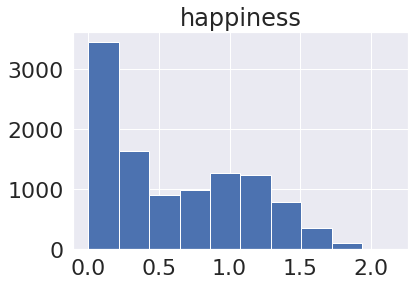

In [ ]:
# distribution of decision function scores for "happiness" for those values >0
# i.e. their binary form=1
# now this will change with min max scaler, for all emotions
df_happiness.hist()

## Min Max Scaling
 Min Max Scaling of decision function scores of emotions for those scores>0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1ac7c25b70>]],
      dtype=object)

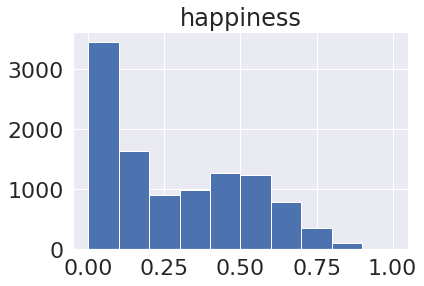

In [ ]:
from sklearn import preprocessing

x = df_happiness.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_happiness_normalized = pd.DataFrame(x_scaled)
df_happiness_normalized.columns= ["happiness"]
df_happiness_normalized.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1ab0492400>]],
      dtype=object)

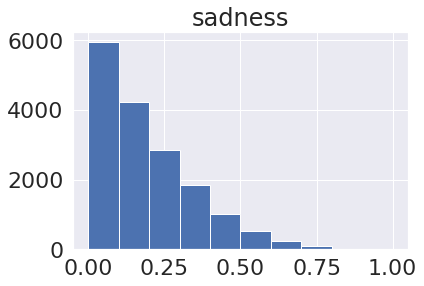

In [ ]:
x = df_sadness.values 
x_scaled = min_max_scaler.fit_transform(x)
df_sadness_normalized = pd.DataFrame(x_scaled)
df_sadness_normalized.columns= ["sadness"]
df_sadness_normalized.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1ab08256d8>]],
      dtype=object)

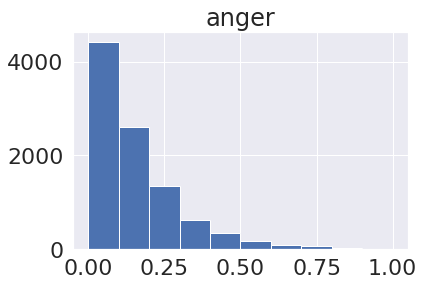

In [ ]:
x = df_anger.values 
x_scaled = min_max_scaler.fit_transform(x)
df_anger_normalized = pd.DataFrame(x_scaled)
df_anger_normalized.columns= ["anger"]
df_anger_normalized.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1ab07900b8>]],
      dtype=object)

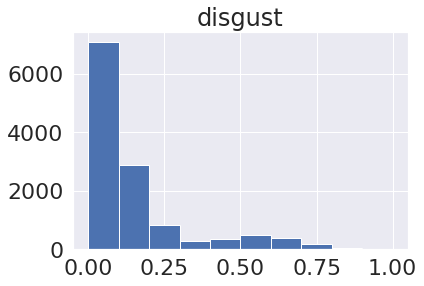

In [ ]:
x = df_disgust.values 
x_scaled = min_max_scaler.fit_transform(x)
df_disgust_normalized = pd.DataFrame(x_scaled)
df_disgust_normalized.columns= ["disgust"]
df_disgust_normalized.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1ab07df4a8>]],
      dtype=object)

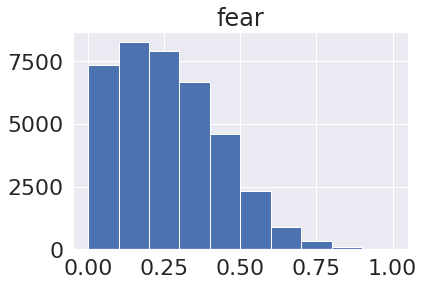

In [ ]:
x = df_fear.values 
x_scaled = min_max_scaler.fit_transform(x)
df_fear_normalized = pd.DataFrame(x_scaled)
df_fear_normalized.columns= ["fear"]
df_fear_normalized.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1ab093de48>]],
      dtype=object)

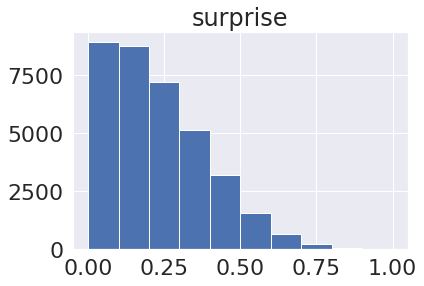

In [ ]:
x = df_surprise.values 
x_scaled = min_max_scaler.fit_transform(x)
df_surprise_normalized = pd.DataFrame(x_scaled)
df_surprise_normalized.columns= ["surprise"]
df_surprise_normalized.hist()

In [ ]:
df_happiness_normalized.describe()

,happiness
count,10763.000000
mean,0.286295
std,0.232673
min,0.000000
25%,0.070361
50%,0.224979
75%,0.485580
max,1.000000


In [ ]:
'''
[0 , 0.25)   => low intensity

[0.25 , 0.5) => medium intensity

[0.5 , 1]    => high intensity

'''
count_happiness_low = 0
count_happiness_medium = 0
count_happiness_high =  0

count_sadness_low=0
count_sadness_medium=0
count_sadness_high=0

count_anger_low=0
count_anger_medium=0
count_anger_high=0

count_disgust_low=0
count_disgust_medium=0
count_disgust_high=0

count_fear_low=0
count_fear_medium=0
count_fear_high=0

count_surprise_low=0
count_surprise_medium=0
count_surprise_high=0


# happiness
for row in df_happiness_normalized.itertuples():
  if row.happiness >=0 and row.happiness <0.25:
    count_happiness_low+=1
  elif row.happiness>=0.25 and row.happiness <0.5:
    count_happiness_medium+=1
  else:
    count_happiness_high+=1

# sadness
for row in df_sadness_normalized.itertuples():
  if row.sadness >=0 and row.sadness <0.25:
    count_sadness_low+=1
  elif row.sadness>=0.25 and row.sadness <0.5:
    count_sadness_medium+=1
  else:
    count_sadness_high+=1

# anger
for row in df_anger_normalized.itertuples():
  if row.anger >=0 and row.anger <0.25:
    count_anger_low+=1
  elif row.anger>=0.25 and row.anger <0.5:
    count_anger_medium+=1
  else:
    count_anger_high+=1

# disgust
for row in df_disgust_normalized.itertuples():
  if row.disgust >=0 and row.disgust <0.25:
    count_disgust_low+=1
  elif row.disgust>=0.25 and row.disgust <0.5:
    count_disgust_medium+=1
  else:
    count_disgust_high+=1


# fear
for row in df_fear_normalized.itertuples():
  if row.fear >=0 and row.fear <0.25:
    count_fear_low+=1
  elif row.fear>=0.25 and row.fear <0.5:
    count_fear_medium+=1
  else:
    count_fear_high+=1

  # surprise
for row in df_surprise_normalized.itertuples():
  if row.surprise >=0 and row.surprise <0.25:
    count_surprise_low+=1
  elif row.surprise>=0.25 and row.surprise <0.5:
    count_surprise_medium+=1
  else:
    count_surprise_high+=1

print("Number of 'happiness' with low intensity: {}".format(count_happiness_low))
print("Number of 'happiness' with medium intensity: {}".format(count_happiness_medium))
print("Number of 'happiness' with high intensity: {}".format(count_happiness_high))

print("========================================================================================")

print("Number of 'sadness' with low intensity: {}".format(count_sadness_low))
print("Number of 'sadness' with medium intensity: {}".format(count_sadness_medium))
print("Number of 'sadness' with high intensity: {}".format(count_sadness_high))

print("========================================================================================")

print("Number of 'anger' with low intensity: {}".format(count_anger_low))
print("Number of 'anger' with medium intensity: {}".format(count_anger_medium))
print("Number of 'anger' with high intensity: {}".format(count_anger_high))

print("========================================================================================")

print("Number of 'disgust' with low intensity: {}".format(count_disgust_low))
print("Number of 'disgust' with medium intensity: {}".format(count_disgust_medium))
print("Number of 'disgust' with high intensity: {}".format(count_disgust_high))

print("========================================================================================")

print("Number of 'fear' with low intensity: {}".format(count_fear_low))
print("Number of 'fear' with medium intensity: {}".format(count_fear_medium))
print("Number of 'fear' with high intensity: {}".format(count_fear_high))

print("========================================================================================")

print("Number of 'surprise' with low intensity: {}".format(count_surprise_low))
print("Number of 'surprise' with medium intensity: {}".format(count_surprise_medium))
print("Number of 'surprise' with high intensity: {}".format(count_surprise_high))

Number of 'happiness' with low intensity: 5587
Number of 'happiness' with medium intensity: 2678
Number of 'happiness' with high intensity: 2498
Number of 'sadness' with low intensity: 11774
Number of 'sadness' with medium intensity: 4093
Number of 'sadness' with high intensity: 866
Number of 'anger' with low intensity: 7814
Number of 'anger' with medium intensity: 1524
Number of 'anger' with high intensity: 359
Number of 'disgust' with low intensity: 10537
Number of 'disgust' with medium intensity: 881
Number of 'disgust' with high intensity: 1143
Number of 'fear' with low intensity: 19551
Number of 'fear' with medium intensity: 15257
Number of 'fear' with high intensity: 3649
Number of 'surprise' with low intensity: 21528
Number of 'surprise' with medium intensity: 11777
Number of 'surprise' with high intensity: 2521


In [ ]:
type(count_happiness_high)

int

In [ ]:
# getting the percentages of intensity graduation per emotion

hap_l= round(count_happiness_low/(count_happiness_low+count_happiness_medium+count_happiness_high)*100, 2)

hap_m = round(count_happiness_medium/(count_happiness_low+count_happiness_medium+count_happiness_high)*100, 2)

hap_h= round(count_happiness_high/(count_happiness_low+count_happiness_medium+count_happiness_high)*100, 2)


sad_l = round(count_sadness_low/(count_sadness_low+count_sadness_medium+count_sadness_high)*100, 2)

sad_m = round(count_sadness_medium/(count_sadness_low+count_sadness_medium+count_sadness_high)*100, 2)

sad_h = round(count_sadness_high/(count_sadness_low+count_sadness_medium+count_sadness_high)*100, 2)


ang_l = round(count_anger_low/(count_anger_low+count_anger_medium+count_anger_high)*100, 2)

ang_m = round(count_anger_medium/(count_anger_low+count_anger_medium+count_anger_high)*100, 2)

ang_h = round(count_anger_high/(count_anger_low+count_anger_medium+count_anger_high)*100, 2)


dis_l = round(count_disgust_low/(count_disgust_low + count_disgust_medium + count_disgust_high)*100, 2)

dis_m = round(count_disgust_medium / (count_disgust_low +count_disgust_medium+ count_disgust_high)*100, 2)

dis_h = round(count_disgust_high/(count_disgust_low + count_disgust_medium + count_disgust_high)*100, 2)


fear_l = round(count_fear_low/(count_fear_low+count_fear_medium+count_fear_high)*100, 2)

fear_m = round(count_fear_medium/(count_fear_low+count_fear_medium+count_fear_high)*100, 2)

fear_h = round(count_fear_high/(count_fear_low+count_fear_medium+count_fear_high)*100, 2)


sur_l = round(count_surprise_low/(count_surprise_low+count_surprise_medium+count_surprise_high)*100, 2)

sur_m = round(count_surprise_medium/(count_surprise_low+count_surprise_medium+count_surprise_high)*100, 2)

sur_h = round(count_surprise_high/(count_surprise_low+count_surprise_medium+count_surprise_high)*100, 2)


print("Percentage of 'happiness' with low intensity: {}".format(hap_l))
print("Percentage of 'happiness' with medium intensity: {}".format(hap_m))
print("Percentage of 'happiness' with high intensity: {}".format(hap_h))

print("=================================================================================================")

print("Percentage of 'sadness' with low intensity: {}".format(sad_l))
print("Percentage of 'sadness' with medium intensity: {}".format(sad_m))
print("Percentage of 'sadness' with high intensity: {}".format(sad_h))

print("=================================================================================================")

print("Percentage of 'anger' with low intensity: {}".format(ang_l))
print("Percentage of 'anger' with medium intensity: {}".format(ang_m))
print("Percentage of 'anger' with high intensity: {}".format(ang_h))

print("=================================================================================================")

print("Percentage of 'disgust' with low intensity: {}".format(dis_l))
print("Percentage of 'disgust' with medium intensity: {}".format(dis_m))
print("Percentage of 'disgust' with high intensity: {}".format(dis_h))

print("=================================================================================================")

print("Percentage of 'fear' with low intensity: {}".format(fear_l))
print("Percentage of 'fear' with medium intensity: {}".format(fear_m))
print("Percentage of 'fear' with high intensity: {}".format(fear_h))

print("=================================================================================================")

print("Percentage of 'surprise' with low intensity: {}".format(sur_l))
print("Percentage of 'surprise' with medium intensity: {}".format(sur_m))
print("Percentage of 'surprise' with high intensity: {}".format(sur_h))

Percentage of 'happiness' with low intensity: 51.91
Percentage of 'happiness' with medium intensity: 24.88
Percentage of 'happiness' with high intensity: 23.21
Percentage of 'sadness' with low intensity: 70.36
Percentage of 'sadness' with medium intensity: 24.46
Percentage of 'sadness' with high intensity: 5.18
Percentage of 'anger' with low intensity: 80.58
Percentage of 'anger' with medium intensity: 15.72
Percentage of 'anger' with high intensity: 3.7
Percentage of 'disgust' with low intensity: 83.89
Percentage of 'disgust' with medium intensity: 7.01
Percentage of 'disgust' with high intensity: 9.1
Percentage of 'fear' with low intensity: 50.84
Percentage of 'fear' with medium intensity: 39.67
Percentage of 'fear' with high intensity: 9.49
Percentage of 'surprise' with low intensity: 60.09
Percentage of 'surprise' with medium intensity: 32.87
Percentage of 'surprise' with high intensity: 7.04


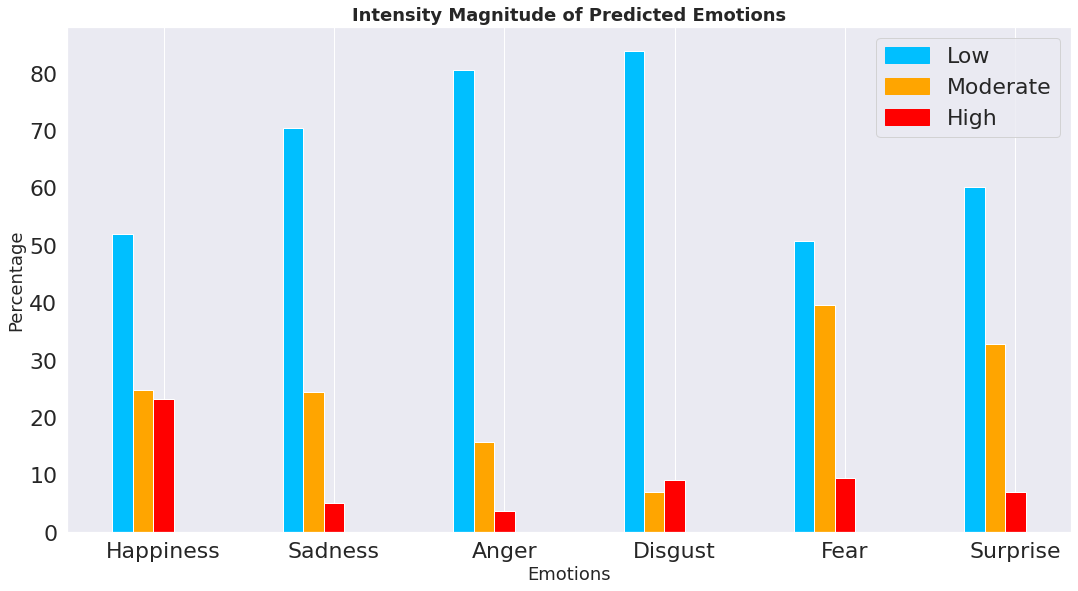

In [ ]:
import matplotlib.patches as mpatches
emotions= ["Happiness", "Sadness", "Anger", "Disgust", "Fear", "Surprise"]
plt.figure(figsize=(18,9.3))
#labels
y1= [hap_l, sad_l, ang_l, dis_l, fear_l, sur_l]

y2= [hap_m, sad_m, ang_m, dis_m, fear_m, sur_m]

y3= [hap_h, sad_h, ang_h, dis_h, fear_h, sur_h] 
x= np.arange(len(y1))


bar_width= 0.12
plt.bar(x, y1, width=bar_width, color="deepskyblue", zorder=2)
plt.bar(x+ bar_width, y2, width=bar_width, color="orange", zorder=2)
plt.bar(x+ bar_width*2, y3, width=bar_width, color="red", zorder=2)

plt.xticks(x+ bar_width*2, emotions)
plt.title("Intensity Magnitude of Predicted Emotions", fontsize=18, fontweight="bold")
plt.xlabel("Emotions", fontsize=18)
plt.ylabel("Percentage", fontsize=18)

deepskyblue_patch= mpatches.Patch(color="deepskyblue", label="Low")
orange_patch= mpatches.Patch(color="orange", label="Moderate")
red_patch= mpatches.Patch(color="red", label="High")
plt.legend(handles= [deepskyblue_patch, orange_patch, red_patch ])

plt.grid(axis="y")

plt.show()

# Example of Emotions Displayed in Movies

In [ ]:
model_predictions_df.columns

Index(['movieId', 'tmdbId', 'title', 'genres', 'overview', 'Vader_polarity',
       'compound', 'neg', 'neu', 'pos', 'NMF_topic', 'NMF_topic_description',
       'entities', 'happiness', 'sadness', 'anger', 'disgust', 'fear',
       'surprise', 'happiness_scores', 'sadness_scores', 'anger_scores',
       'disgust_scores', 'fear_scores', 'surprise_scores'],
      dtype='object')

In [ ]:
data=[]
for row in model_predictions_df.itertuples(index=True, name='Pandas'):
  if row.tmdbId==278 or row.tmdbId==278 or row.tmdbId==238 or row.tmdbId==240 or row.tmdbId==155 or row.tmdbId==389 or row.tmdbId==424 or row.tmdbId==122 or row.tmdbId==680 or row.tmdbId==429 or row.tmdbId==120 or row.tmdbId==550 or row.tmdbId==13 or row.tmdbId==27205 or row.tmdbId==603 or row.tmdbId==769 or row.tmdbId==346 or row.tmdbId==637 or row.tmdbId==274 or row.tmdbId==157336 or row.tmdbId==423 or row.tmdbId==73 or row.tmdbId==1422 or row.tmdbId==289 or row.tmdbId==279 or row.tmdbId==16869 or row.tmdbId==111 or row.tmdbId==103 or row.tmdbId==194 or row.tmdbId==949 or row.tmdbId==453 or row.tmdbId==752 or row.tmdbId==745 or row.tmdbId==12 or row.tmdbId==13223 or row.tmdbId==28178 or row.tmdbId==1366 or row.tmdbId==218 or row.tmdbId==299534:
    data.append([row.tmdbId, row.title,
                 row.happiness, row.sadness,row.anger,
                 row.disgust, row.fear, row.surprise,
                 row.happiness_scores, row.sadness_scores, row.anger_scores,
                 row.disgust_scores, row.fear_scores, row.surprise_scores])

df = pd.DataFrame(data, columns=['tmdbId', "title", 
                                 "happiness", "sadness", "anger", "disgust", "fear", "surprise",
                                 "happiness_scores", "sadness_scores", "anger_scores", "disgust_scores", "fear_scores", "surprise_scores"])
df.shape

(38, 14)

In [ ]:
df.iloc[30:,:]

,tmdbId,title,happiness,sadness,anger,disgust,fear,surprise,happiness_scores,sadness_scores,anger_scores,disgust_scores,fear_scores,surprise_scores
30,1422.0,depart the,0,0,0,0,1,0,-0.588882,-0.538457,-0.623778,-0.278571,0.754930,-0.099402
31,155.0,dark knight the,0,0,1,0,1,0,-0.987106,-0.565297,0.586063,-0.217503,0.726112,-0.691321
32,13223.0,gran torino,0,0,1,0,1,0,-0.847692,-0.212908,0.212701,-0.574863,0.710265,-0.277675
33,16869.0,inglouri basterd,0,1,1,1,1,0,-0.972756,0.115334,0.379563,0.370023,0.810471,-0.225590
34,28178.0,hachiko dog stori k hachi dog tale,0,1,0,1,1,0,-0.656782,1.158154,-0.744113,0.007127,0.805521,-0.125042
35,27205.0,incept,0,0,0,0,1,1,-0.775412,-0.419431,-0.020192,-0.517638,0.289655,0.405086
36,157336.0,interstellar,0,0,0,0,1,1,-0.542126,-0.889136,-0.806027,-0.728338,0.469633,0.685324
37,299534.0,aveng infin war part ii,0,0,1,0,1,0,-0.898298,-0.304467,0.418385,-0.158032,0.932411,-0.720660
